# Summary of this notebook
This notebook describes the  generating of process models in json format from multimodal documents with GTP-4V. First, we preprocess the documents. Then we use zero shot prompting by giving GTP-4V the whole json schema and ask him if he can extract all the relevant information at once without further information. Then we use one-shot prompting and give one example in the instructions. After that we give 3 examples with few-shot prompting. We apply these three approaches to the whole dataset.

Furthermore we experiment with Chain-Of-Though prompting which is too expensive for further evaluations. In additon we introduce langchain, where the results are different with the same prompts, not sure why, but its not really needed fot the use case anyway. Then we experiement with visualising the generated process models with mermaid.js, which is also not too helpful as the functionality for visualising lanes and flows is limited.

# Preprocessing the documents
chatGPT takes the images as b64 encoded and as messages. Therefore we transform the images in that needed format.

In total 7 message contents. The first one looks like this:
 {'type': 'image_url', 'image_url': {'url': ''}}

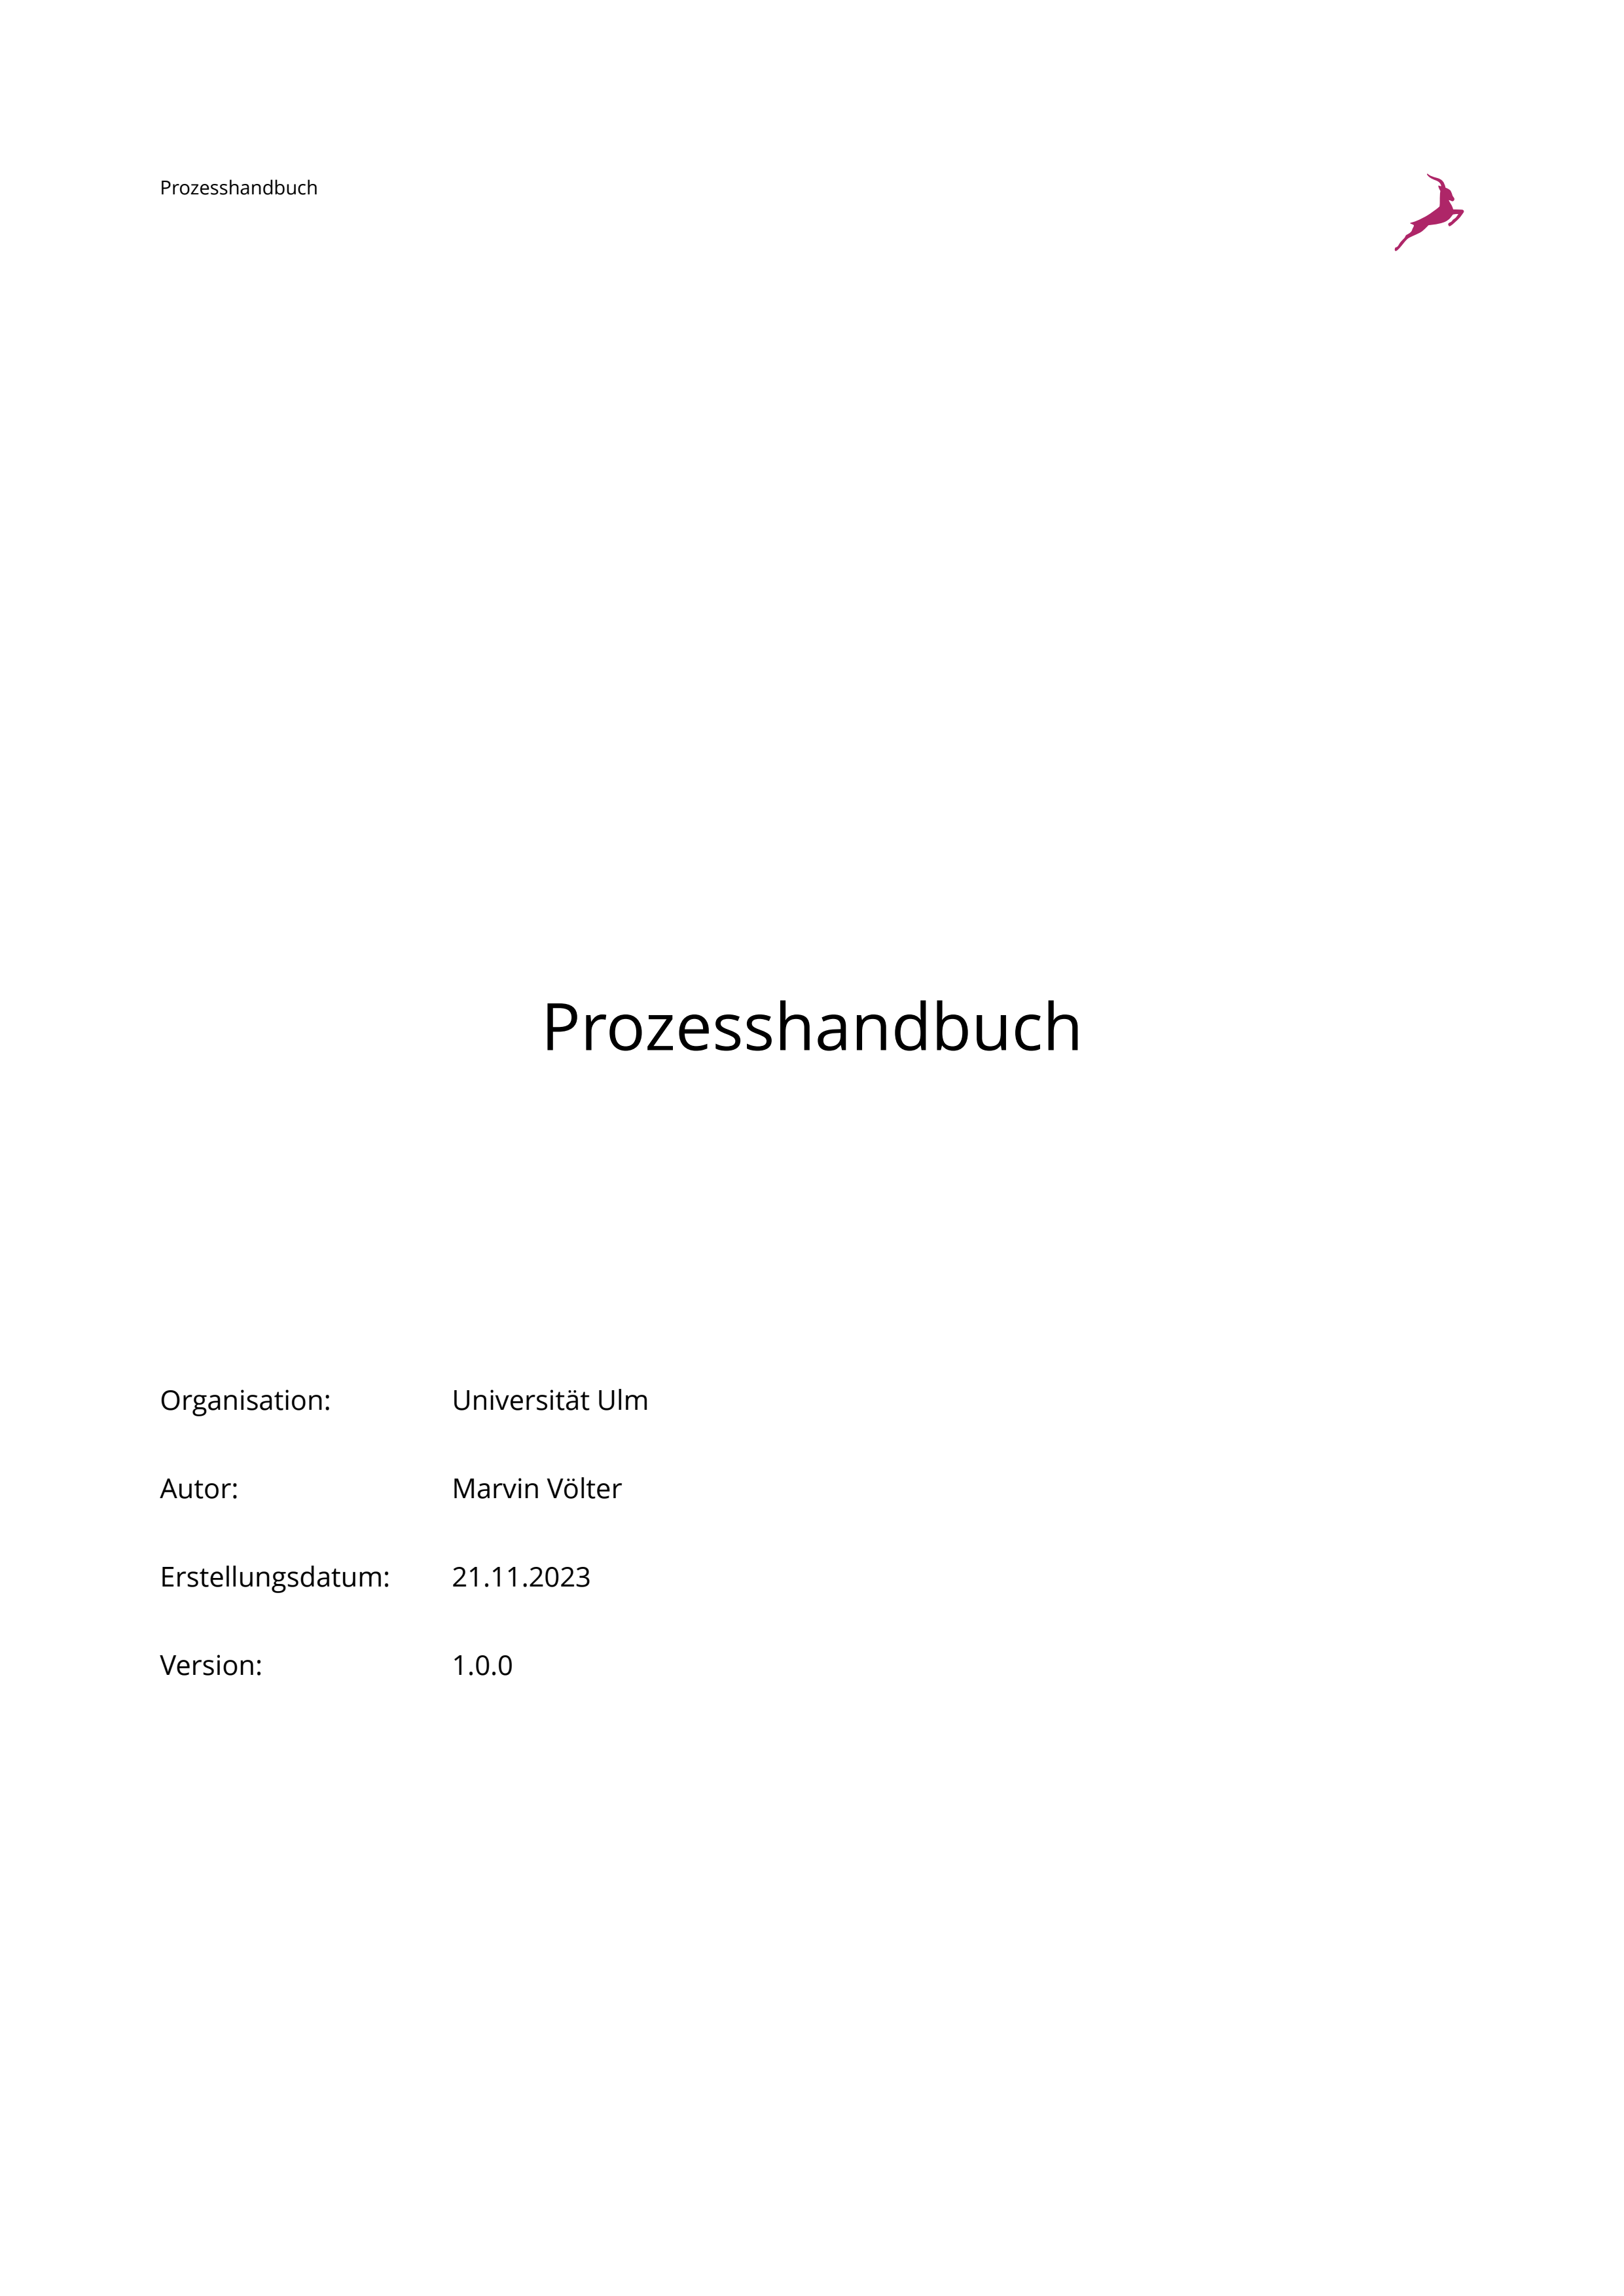

In [1]:
from multimodalgenai.generation.pipeline import get_images_as_message_contents

# example usage
image_paths = [
    '../data/examples/pdf_page_1.png',
    '../data/examples/pdf_page_2.png',
    '../data/examples/pdf_page_3.png',
    '../data/examples/pdf_page_4.png',
    '../data/examples/pdf_page_5.png',
    '../data/examples/pdf_page_6.png',
    '../data/examples/pdf_page_7.png'
 ]
message_contents = get_images_as_message_contents(image_paths)
len(message_contents)
print(f"In total {len(message_contents)} message contents. The first one looks like this:\n", message_contents[0])

# Zero Shot Prompting as the simplest approach
The simplest approach is to give chatGPT the whole schema and ask him if he can extract all the relevant information at once without further information.

In [2]:
from multimodalgenai.generation.pipeline import get_cleaned_response
from multimodalgenai.generation.LLM import ChatGPT_private_subscription
from multimodalgenai.generation.zero_shot import zero_shot

LLM = ChatGPT_private_subscription()
response = zero_shot(LLM, message_contents)
print(get_cleaned_response(response))

{'tasks': [{'id': '0', 'name': 'Send receipt confirmation', 'type': 'task'},
  {'id': '1', 'name': 'Applicant verified', 'type': 'task'},
  {'id': '2', 'name': 'Invite to job interview', 'type': 'task'},
  {'id': '3', 'name': 'Prepare employment agreement', 'type': 'task'},
  {'id': '4', 'name': 'Carry out job interview', 'type': 'task'},
  {'id': '5', 'name': 'Applicant suitable?', 'type': 'task'},
  {'id': '6', 'name': 'Send employment contract', 'type': 'task'},
  {'id': '7', 'name': 'Send rejection', 'type': 'task'}],
 'events': [{'id': '8', 'name': 'Receipt of application', 'type': 'start'},
  {'id': '9',
   'name': 'Receipt of signed employment contract',
   'type': 'intermediate'},
  {'id': '10', 'name': 'Signed employment contract is present', 'type': 'end'},
  {'id': '11', 'name': 'Rejection sent', 'type': 'intermediate'},
  {'id': '12', 'name': 'Applicant rejected', 'type': 'end'}],
 'gateways': [{'id': '13', 'name': 'Application status?', 'type': 'exclusive'},
  {'id': '14',

# One shot prompting
Giving one example might help chatGPT to perform better


In [4]:
from multimodalgenai.generation.pipeline import get_cleaned_response
from multimodalgenai.generation.LLM import ChatGPT_private_subscription
from multimodalgenai.generation.one_shot import one_shot

LLM = ChatGPT_private_subscription()
response = one_shot(LLM, message_contents)
print(get_cleaned_response(response))

{'tasks': [{'id': '0', 'name': 'Send receipt confirmation', 'type': 'Task'}, {'id': '1', 'name': 'Applicant verified', 'type': 'Task'}, {'id': '2', 'name': 'Invite to job interview', 'type': 'Task'}, {'id': '3', 'name': 'Prepare employment agreement', 'type': 'Task'}, {'id': '4', 'name': 'Carry out job interview', 'type': 'Task'}, {'id': '5', 'name': 'Send employment contract', 'type': 'Task'}, {'id': '6', 'name': 'Send rejection', 'type': 'Task'}], 'events': [{'id': '7', 'name': 'Receipt of application', 'type': 'Start'}, {'id': '8', 'name': 'Receipt of signed employment contract', 'type': 'Intermediate'}, {'id': '9', 'name': 'Signed employment contract is present', 'type': 'End'}, {'id': '10', 'name': 'Rejection sent', 'type': 'Intermediate'}, {'id': '11', 'name': 'Applicant rejected', 'type': 'End'}], 'gateways': [{'id': '12', 'name': 'Applicant suitable?', 'type': 'Exclusive'}, {'id': '13', 'name': 'Application status?', 'type': 'Exclusive'}], 'pools': [{'id': '14', 'name': 'ACME A

# Few shot prompting
Giving more examples (maybe 3-5) might even more

In [ ]:
from multimodalgenai.generation.pipeline import get_cleaned_response
from multimodalgenai.generation.LLM import ChatGPT_private_subscription
from multimodalgenai.generation.few_shot import few_shot

LLM = ChatGPT_private_subscription()
response = few_shot(LLM, message_contents)
print(get_cleaned_response(response))

# Lets apply this to the data set

In [16]:

from multimodalgenai.generation.pipeline import generate_for_index
from multimodalgenai.generation.zero_shot import zero_shot
from multimodalgenai.generation.one_shot import one_shot
from multimodalgenai.generation.few_shot import few_shot

# test this for one index
LLM = ChatGPT_private_subscription()
test_index = 3
print(generate_for_index(LLM, zero_shot, test_index))
print(generate_for_index(LLM, one_shot, test_index))
print(generate_for_index(LLM, few_shot, test_index))








{'tasks': [{'id': '0', 'name': 'Send receipt confirmation', 'type': 'Send'}, {'id': '1', 'name': 'Applicant verified', 'type': 'Business Rule'}, {'id': '2', 'name': 'Invite to job interview', 'type': 'Send'}, {'id': '3', 'name': 'Prepare employment agreement', 'type': 'Task'}, {'id': '4', 'name': 'Carry out job interview', 'type': 'Task'}, {'id': '5', 'name': 'Send employment contract', 'type': 'Send'}, {'id': '6', 'name': 'Send rejection', 'type': 'Send'}], 'events': [{'id': '7', 'name': 'Receipt of application', 'type': 'StartMessageEvent'}, {'id': '8', 'name': 'Receipt of signed employment contract', 'type': 'IntermediateMessageEventCatching'}, {'id': '9', 'name': 'Signed employment contract is present', 'type': 'EndNoneEvent'}, {'id': '10', 'name': 'Rejection sent', 'type': 'IntermediateMessageEventThrowing'}, {'id': '11', 'name': 'Applicant rejected', 'type': 'EndNoneEvent'}], 'gateways': [{'id': '12', 'name': 'Applicant suitable?', 'type': 'Exclusive_Databased_Gateway'}, {

In [2]:
from multimodalgenai.generation.pipeline import generate_for_index
from multimodalgenai.generation.zero_shot import zero_shot
from multimodalgenai.generation.one_shot import one_shot
from multimodalgenai.generation.few_shot import few_shot
from multimodalgenai.generation.LLM import ChatGPT_private_subscription

# Lets make this for some more entries 
LLM = ChatGPT_private_subscription()
for i in range(103,123):
    print("Generating for ", i)
    print(generate_for_index(LLM, zero_shot, i, save_as_file=True))
    print(generate_for_index(LLM, one_shot, i, save_as_file=True))
    print(generate_for_index(LLM, few_shot, i, save_as_file=True))


# 45 seconds, 45 min for 20*3
# for one: 45 seconds until a minute
# asnwer around 700 - 1500 tokens, around prompt toekens 17000 - 20000 for few shot


Generating for  103







stop
CompletionUsage(completion_tokens=1147, prompt_tokens=8678, total_tokens=9825)
{'tasks': [{'id': '0', 'name': 'Check Application Procedure', 'type': 'Task'}, {'id': '1', 'name': 'Apply as Non-EU/ International Applicant', 'type': 'Task'}, {'id': '2', 'name': 'Apply via Uni-Assist', 'type': 'Task'}, {'id': '3', 'name': 'Send Required Documents to Uni-Assist', 'type': 'Task'}, {'id': '4', 'name': 'Apply as FH-SWF Graduate', 'type': 'Task'}, {'id': '5', 'name': 'Apply via FH-SWF Online Portal', 'type': 'Task'}, {'id': '6', 'name': 'Contact IMIS Office', 'type': 'Task'}, {'id': '7', 'name': 'Apply as EU Applicant', 'type': 'Task'}, {'id': '8', 'name': 'Send your Required Documents', 'type': 'Task'}, {'id': '9', 'name': 'Contact IMIS Office', 'type': 'Task'}], 'events': [{'id': '10', 'name': 'Application for IMIS', 'type': 'StartNoneEvent'}, {'id': '11', 'name': 'Get Decision Within 10-12 Weeks', 'type': 'IntermediateTimerEvent'}, {'id': '12', 'name': 'Get De

# Chain of thought prompting
LLMs often have difficulties doing all the work at once. It is promising to ask step by step and chain th results together. For example we could first ask to give a list of task, then a list of events, then a list of gateways, then a list of sequence flows etc.

The results are quite promising but the operation is quite costly today. In the future that should change, because openAI announced that they didnt focused on cost optimization yet but will start working on it for the next models.

# LangChain
For more advanced use cases like chain of thoughts or few shot prompting LangChain is often used. It is a framework that makes the code more scalable, reusable and exchangable. Strangely it produces different and worse results when using chatGPT directly. I signed up for the beta phase waitlist of LangSmith to investigate this further. Until then we will work with chatGPT directly as the use case is still releatively manageable.

[chain/start] [1:chain:RunnableSequence] Entering Chain run with input:
{
  "schema": "{'$schema': 'https://json-schema.org/draft/2020-12/schema', 'title': 'BPMN Schema', 'type': 'object', 'properties': {'tasks': {'type': 'array', 'items': {'$ref': '#/$defs/task'}}, 'events': {'type': 'array', 'items': {'$ref': '#/$defs/event'}}, 'gateways': {'type': 'array', 'items': {'$ref': '#/$defs/gateway'}}, 'pools': {'type': 'array', 'items': {'$ref': '#/$defs/pool'}}, 'messageFlows': {'type': 'array', 'items': {'$ref': '#/$defs/messageFlow'}}, 'sequenceFlows': {'type': 'array', 'items': {'$ref': '#/$defs/sequenceFlow'}}}, 'required': ['tasks', 'events', 'gateways', 'pools', 'messageFlows', 'sequenceFlows'], '$defs': {'task': {'type': 'object', 'properties': {'id': {'type': 'string'}, 'name': {'type': 'string'}, 'type': {'type': 'string'}}, 'required': ['id', 'name', 'type'], 'description': 'A unit of work, the job to be performed'}, 'event': {'type': 'object', 'properties': {'id': {'type': 'str
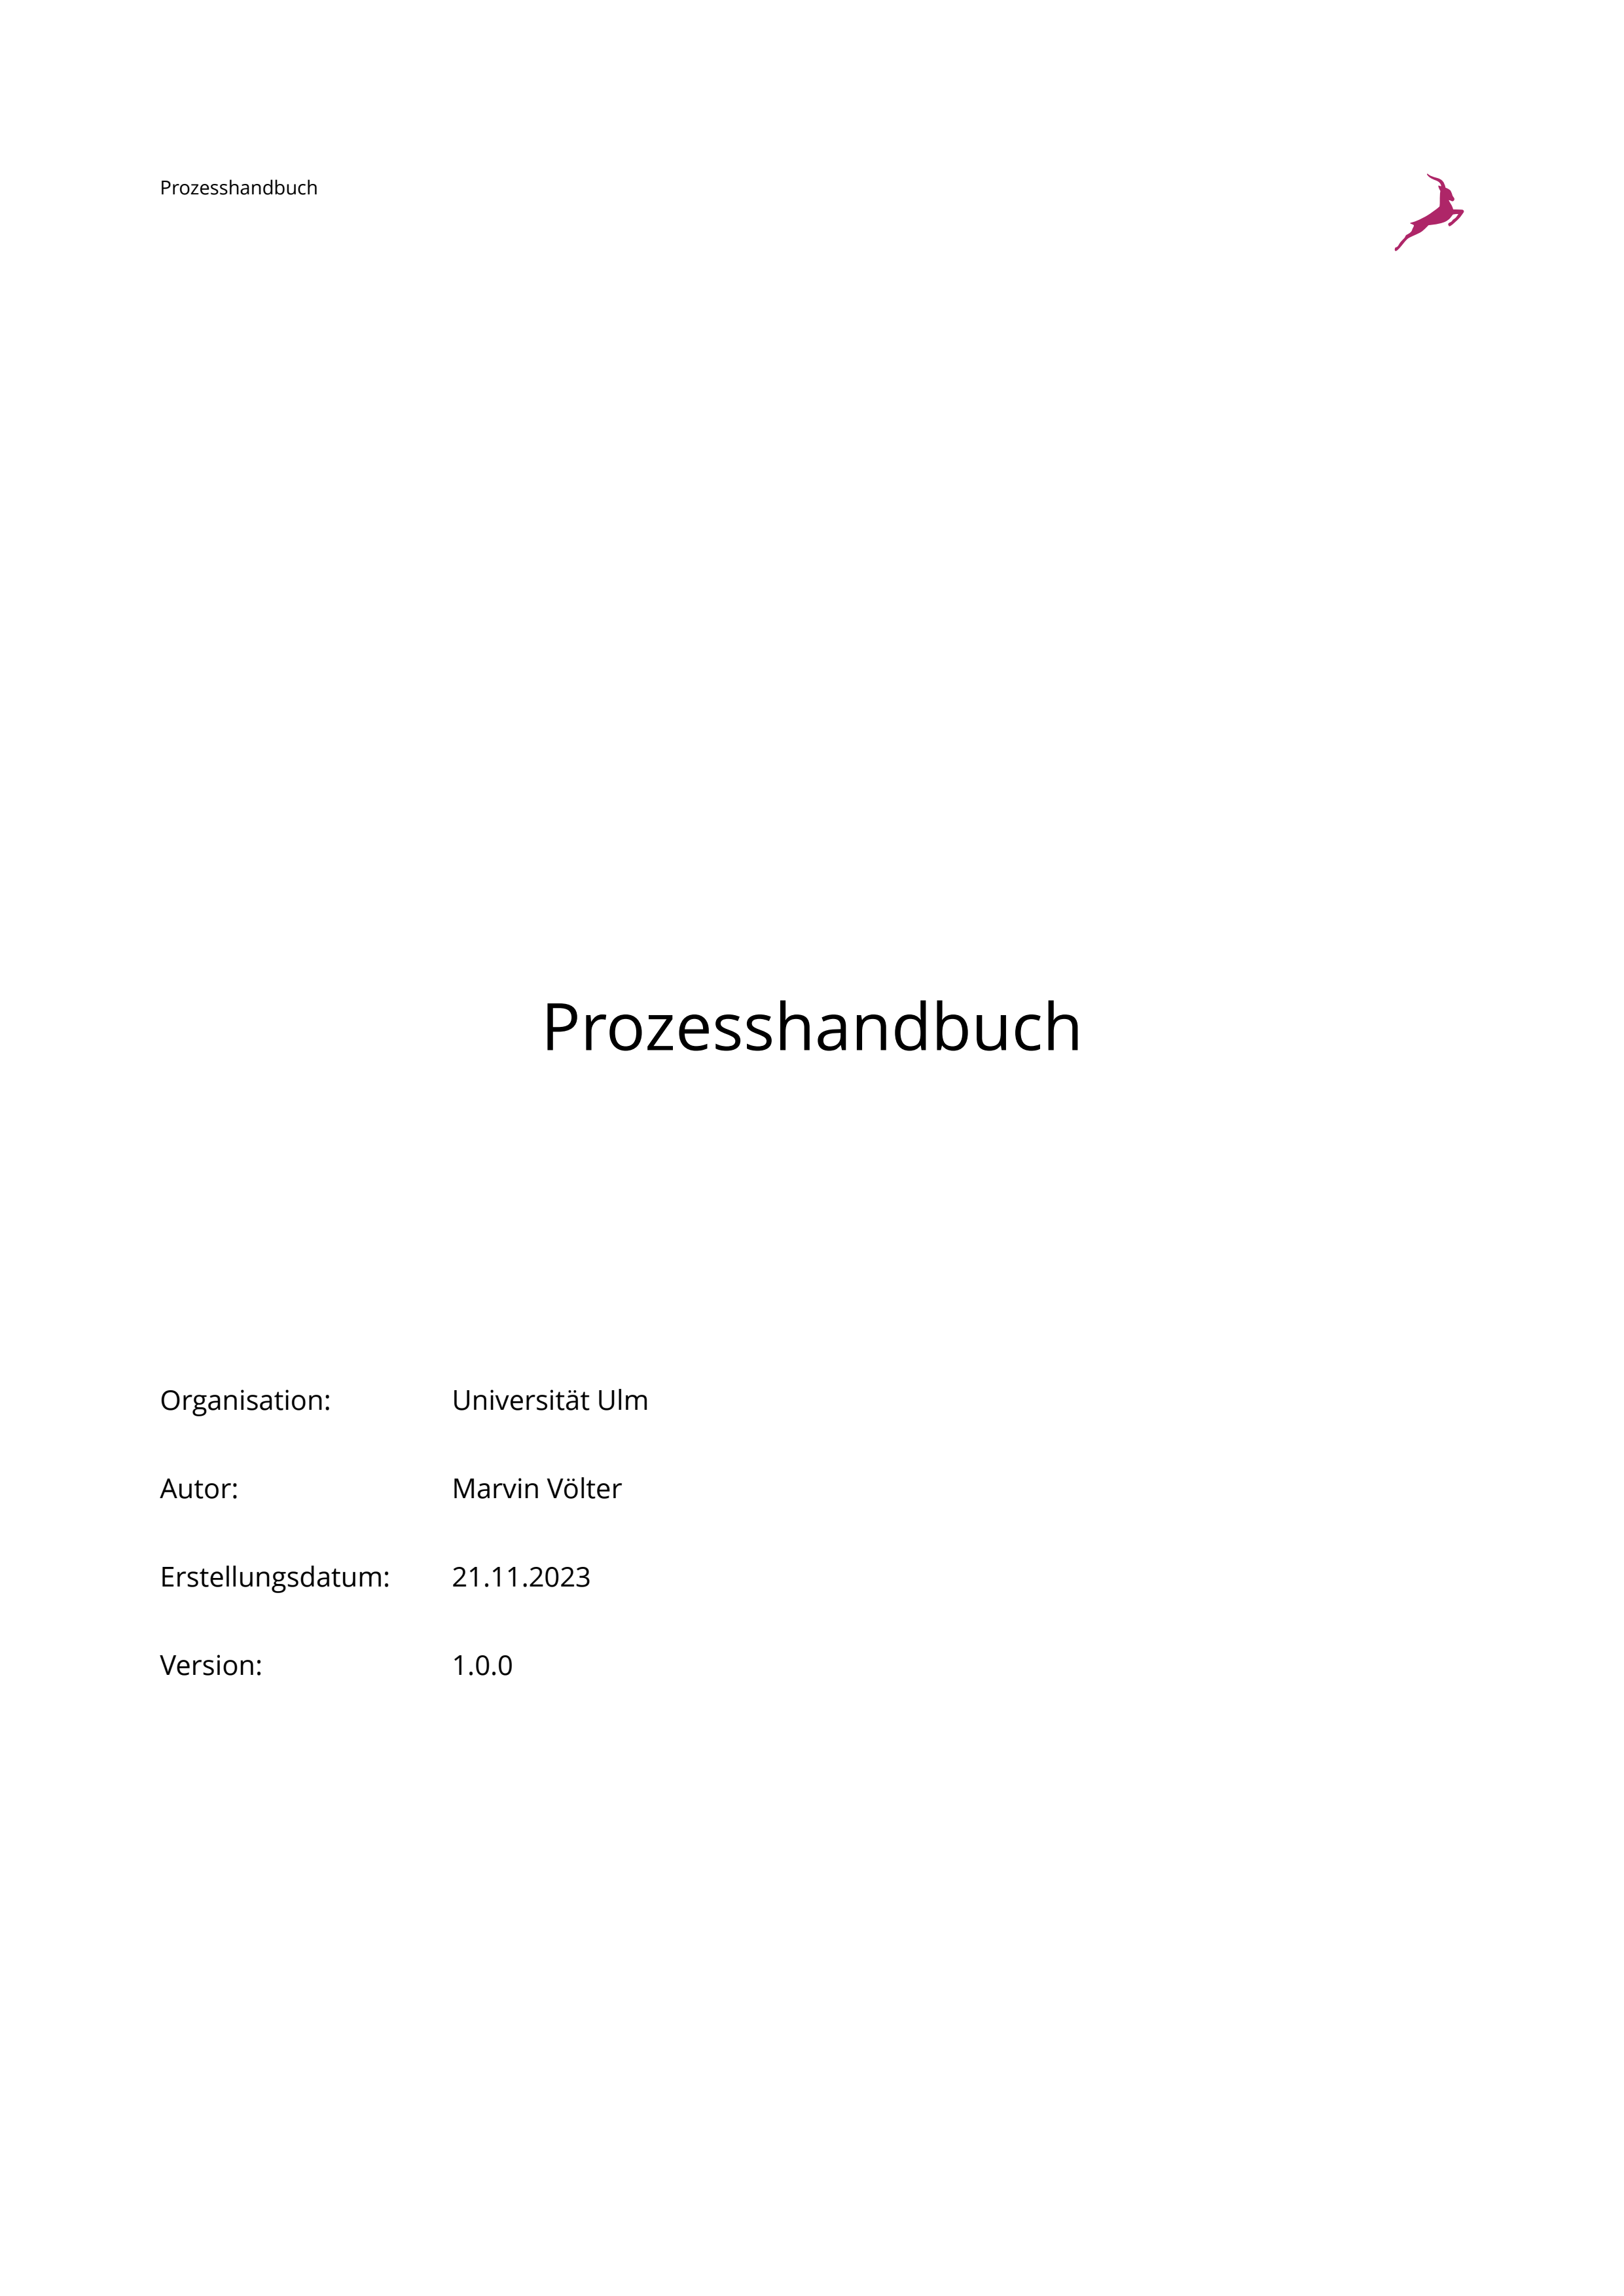
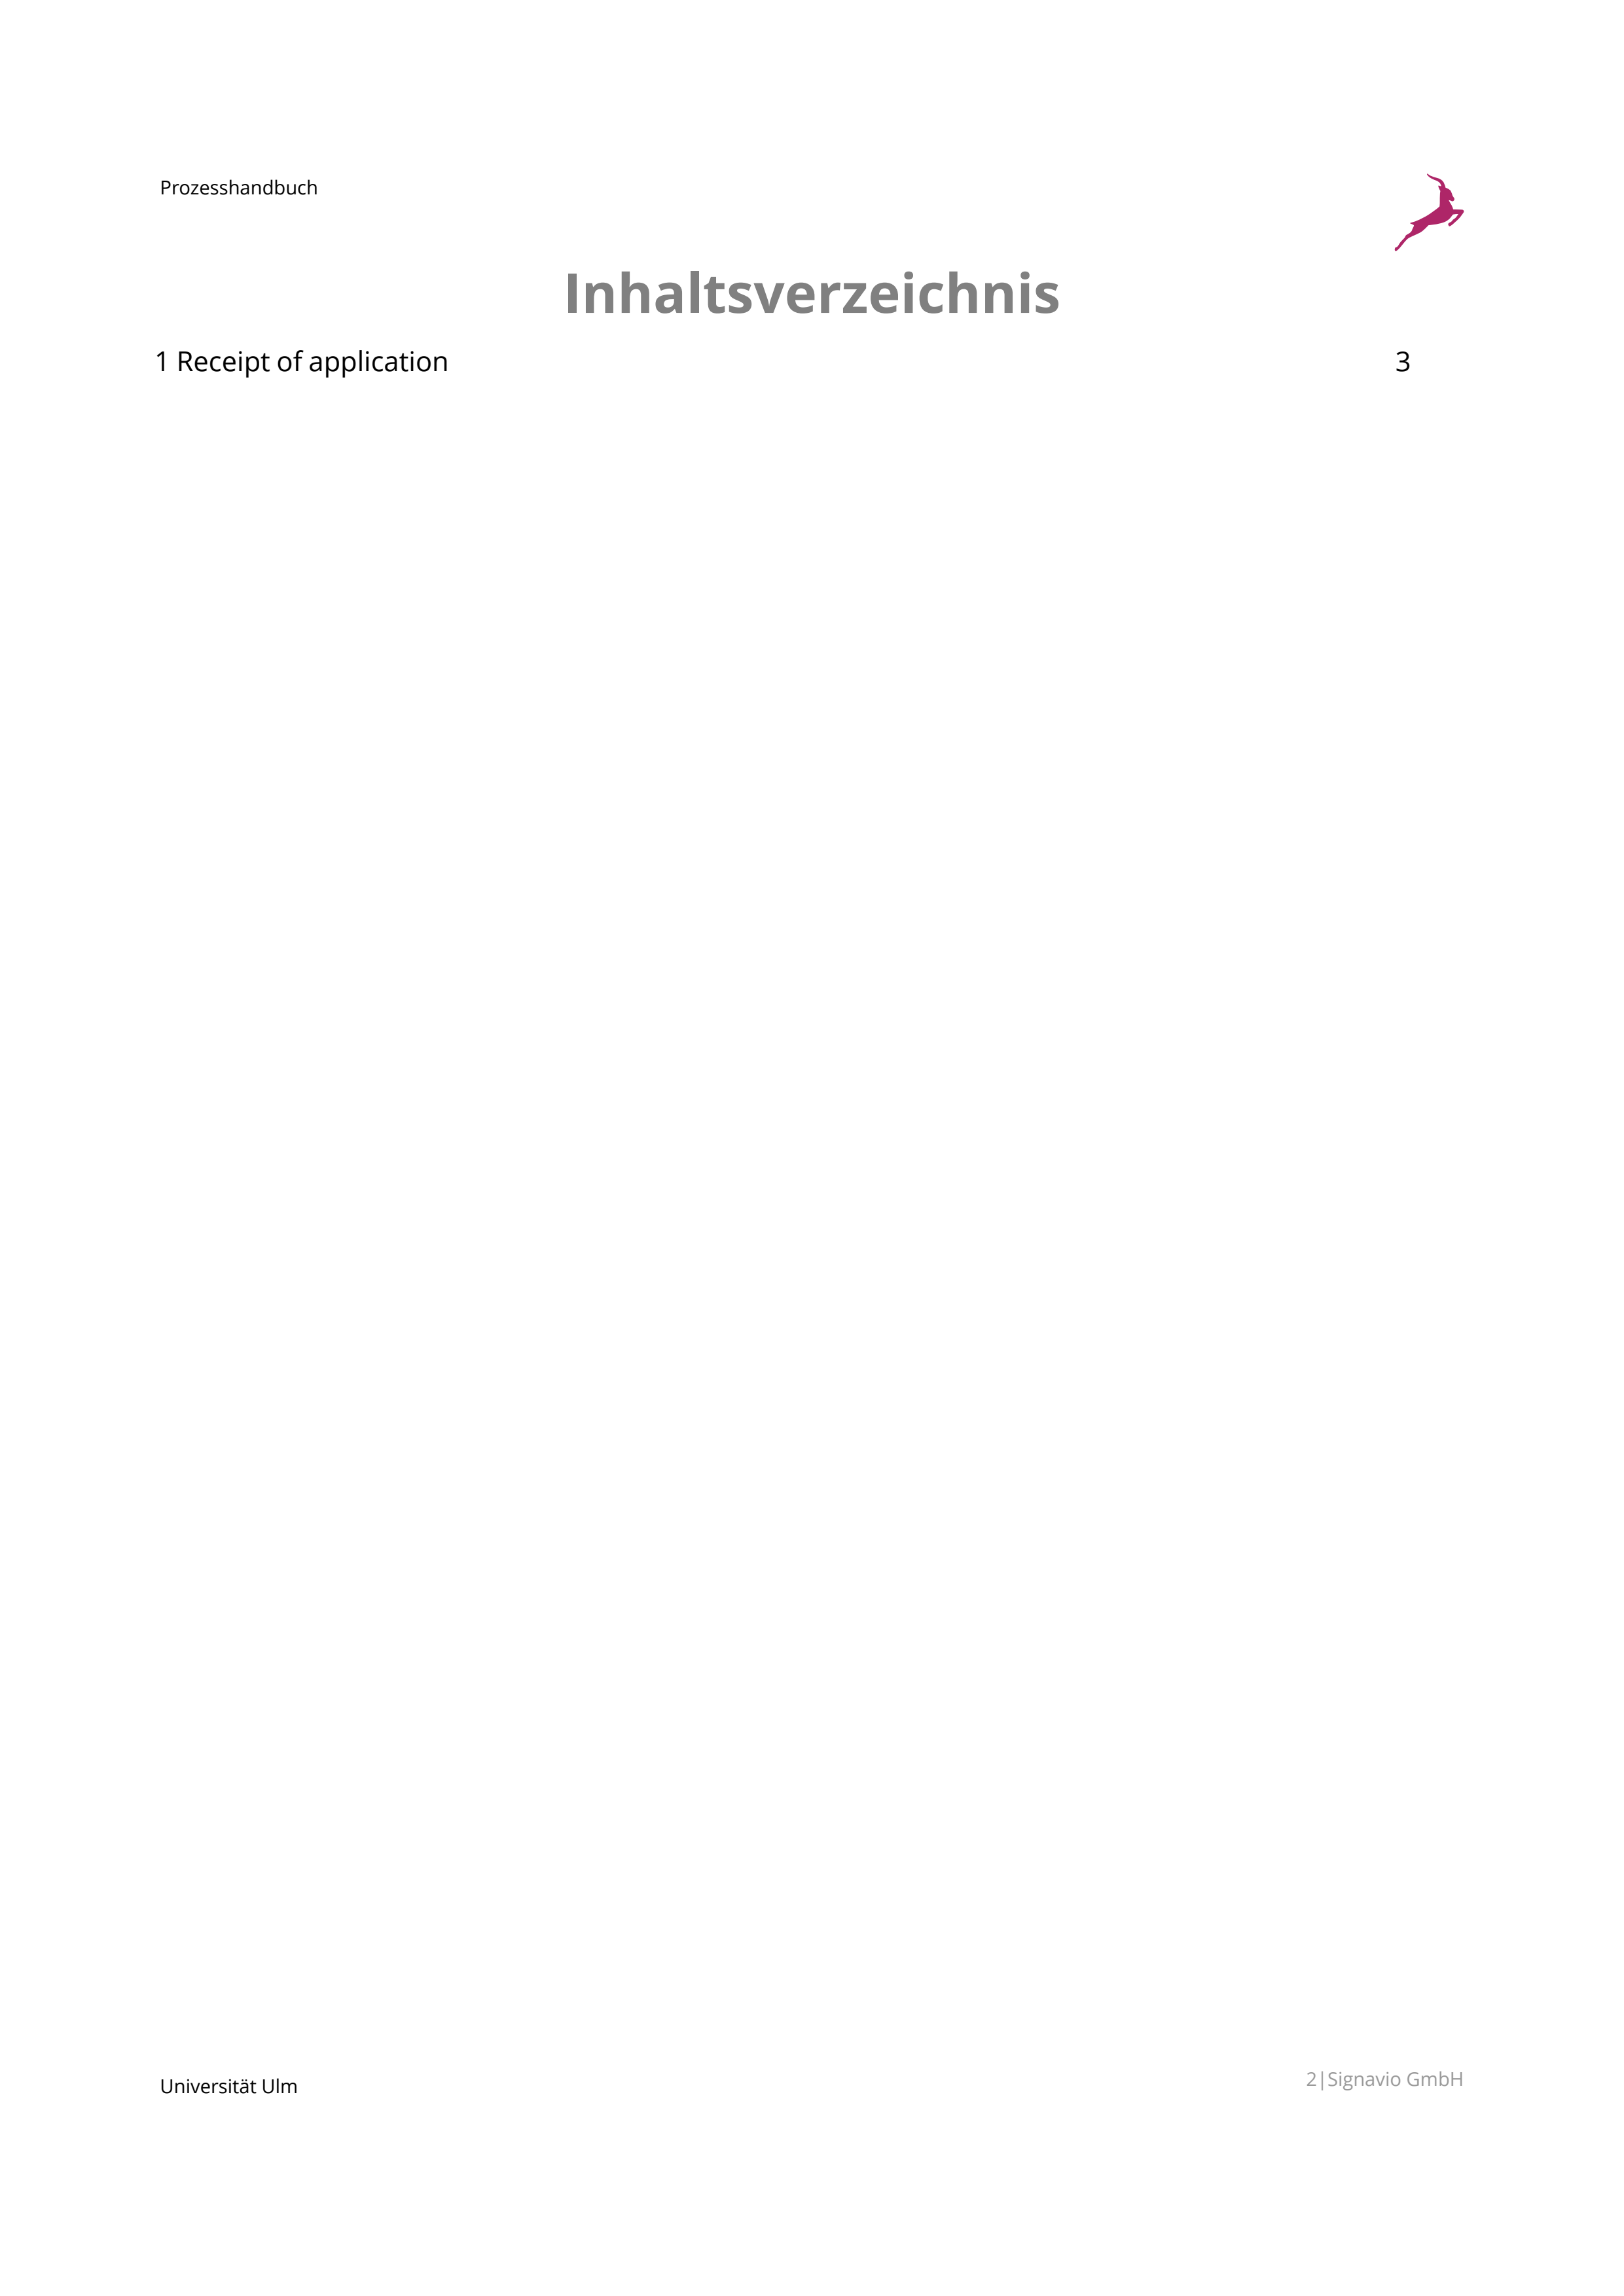
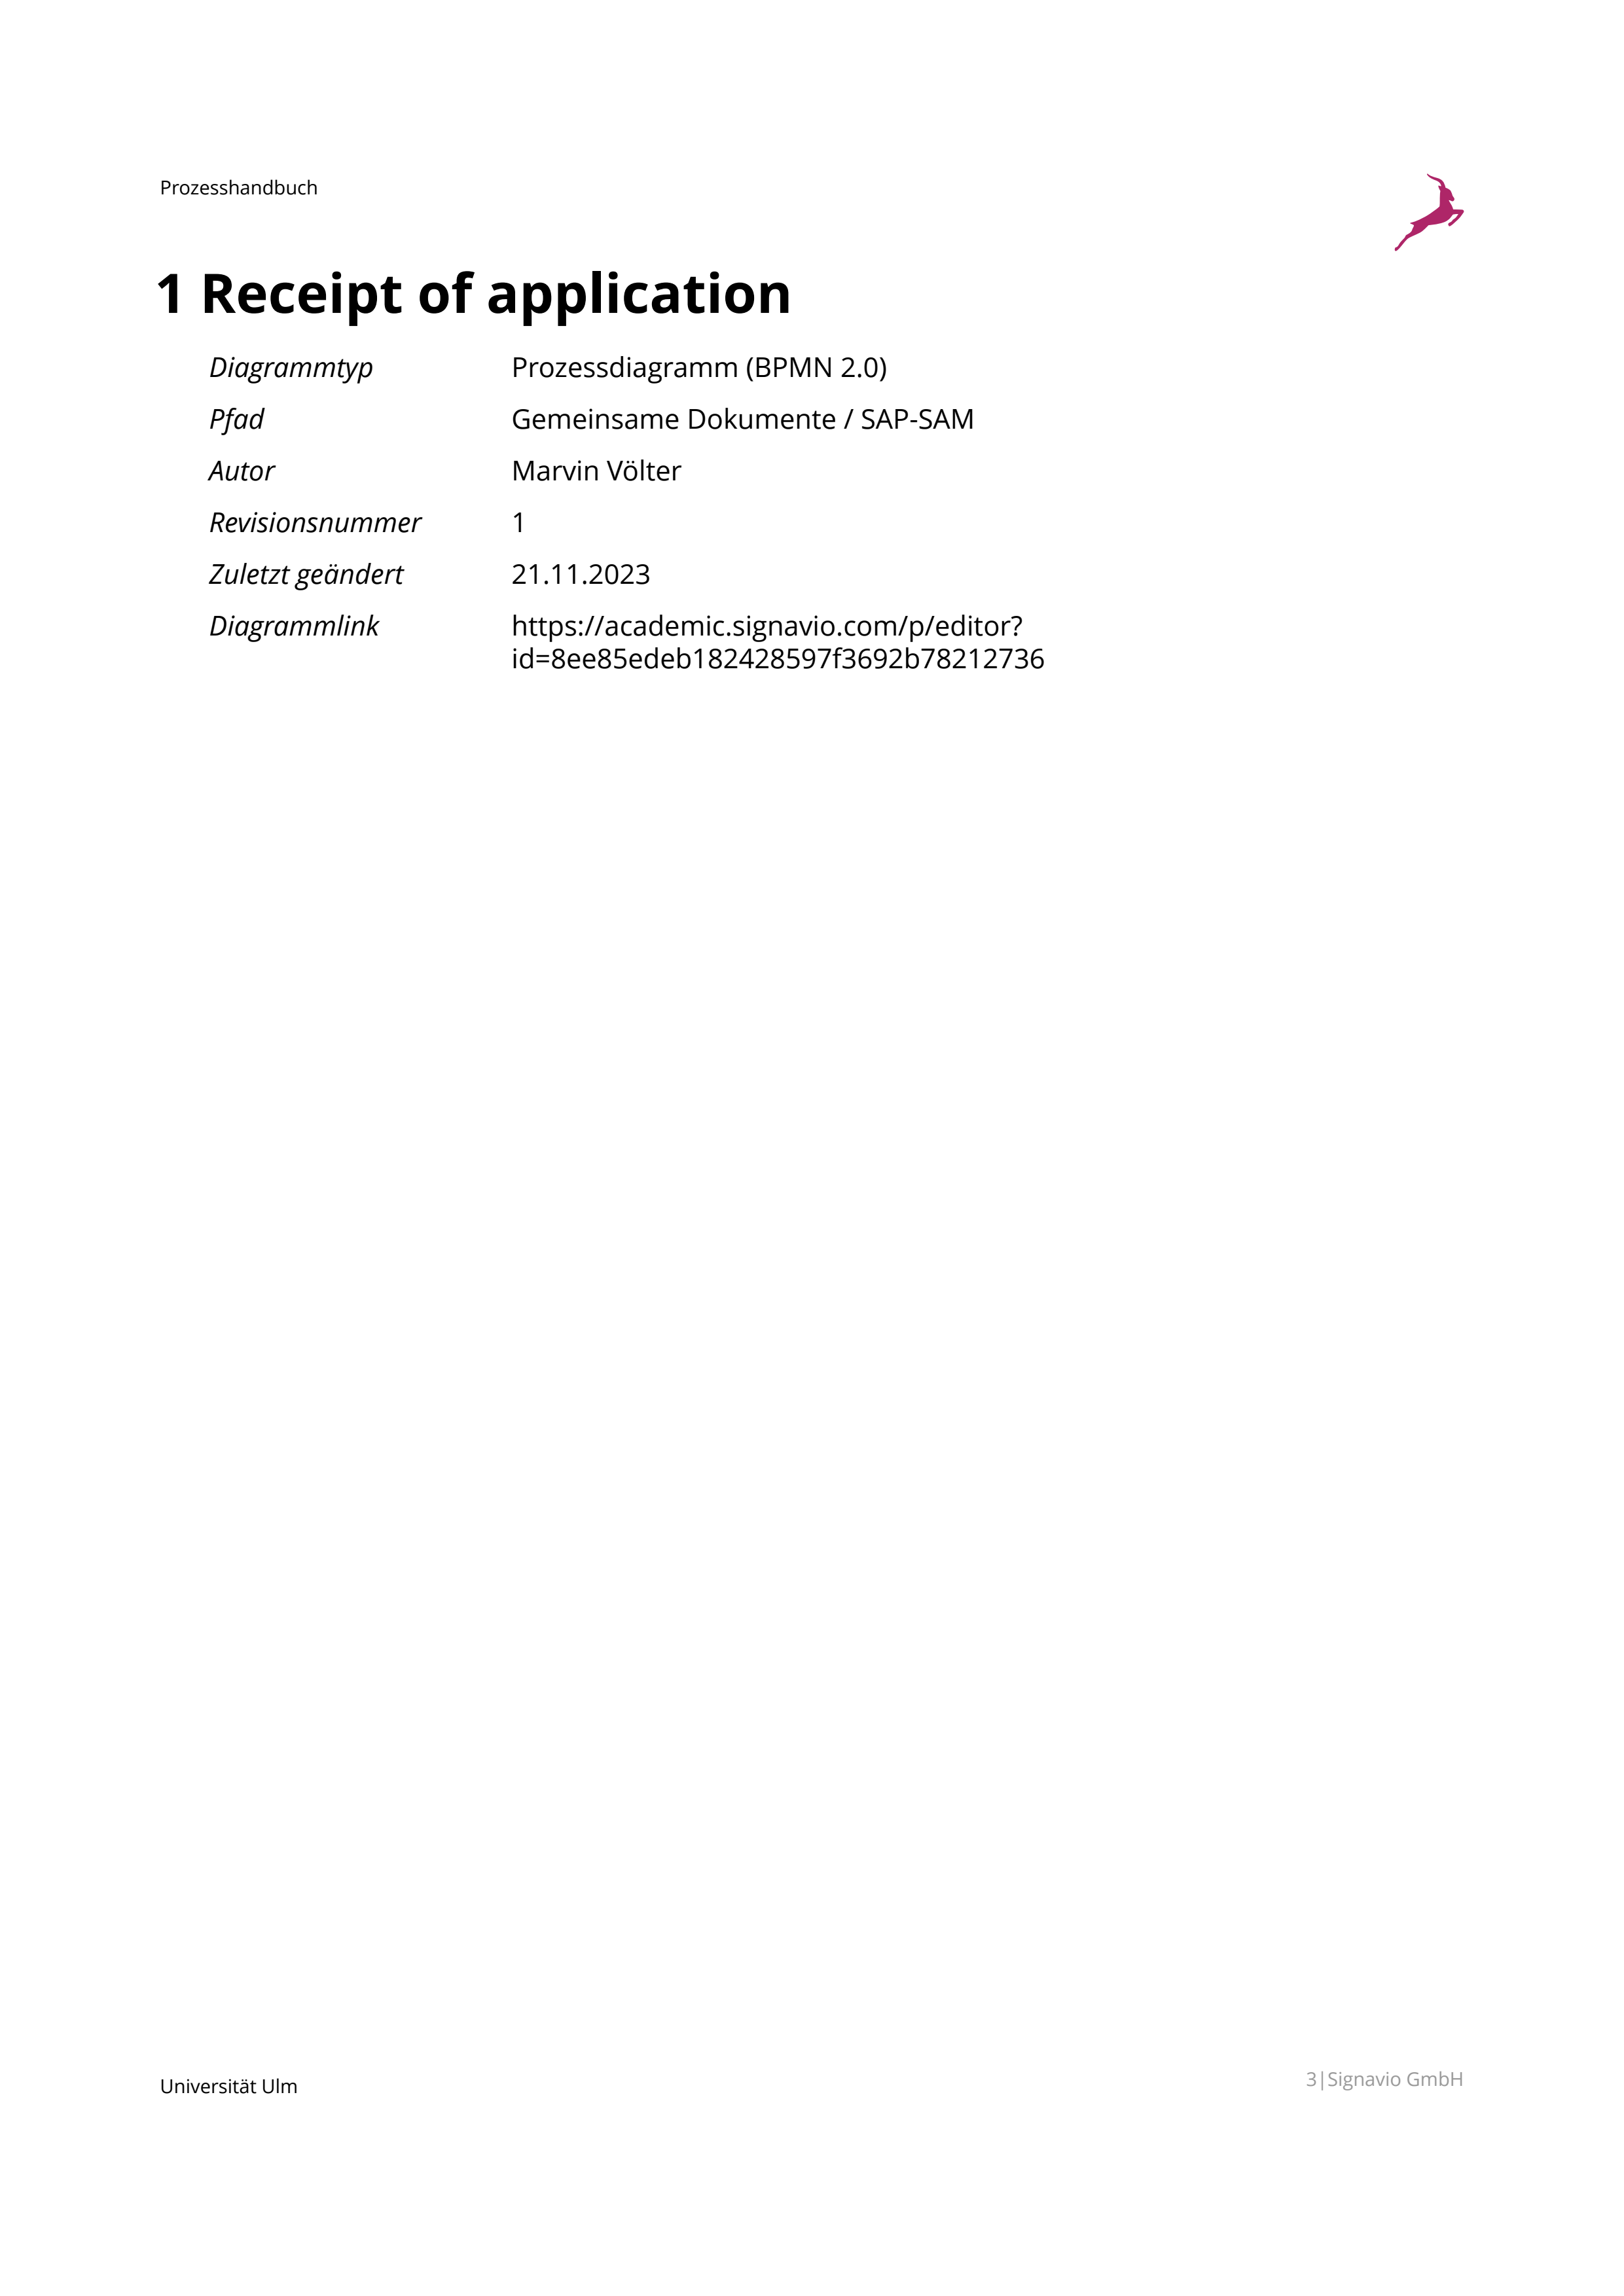
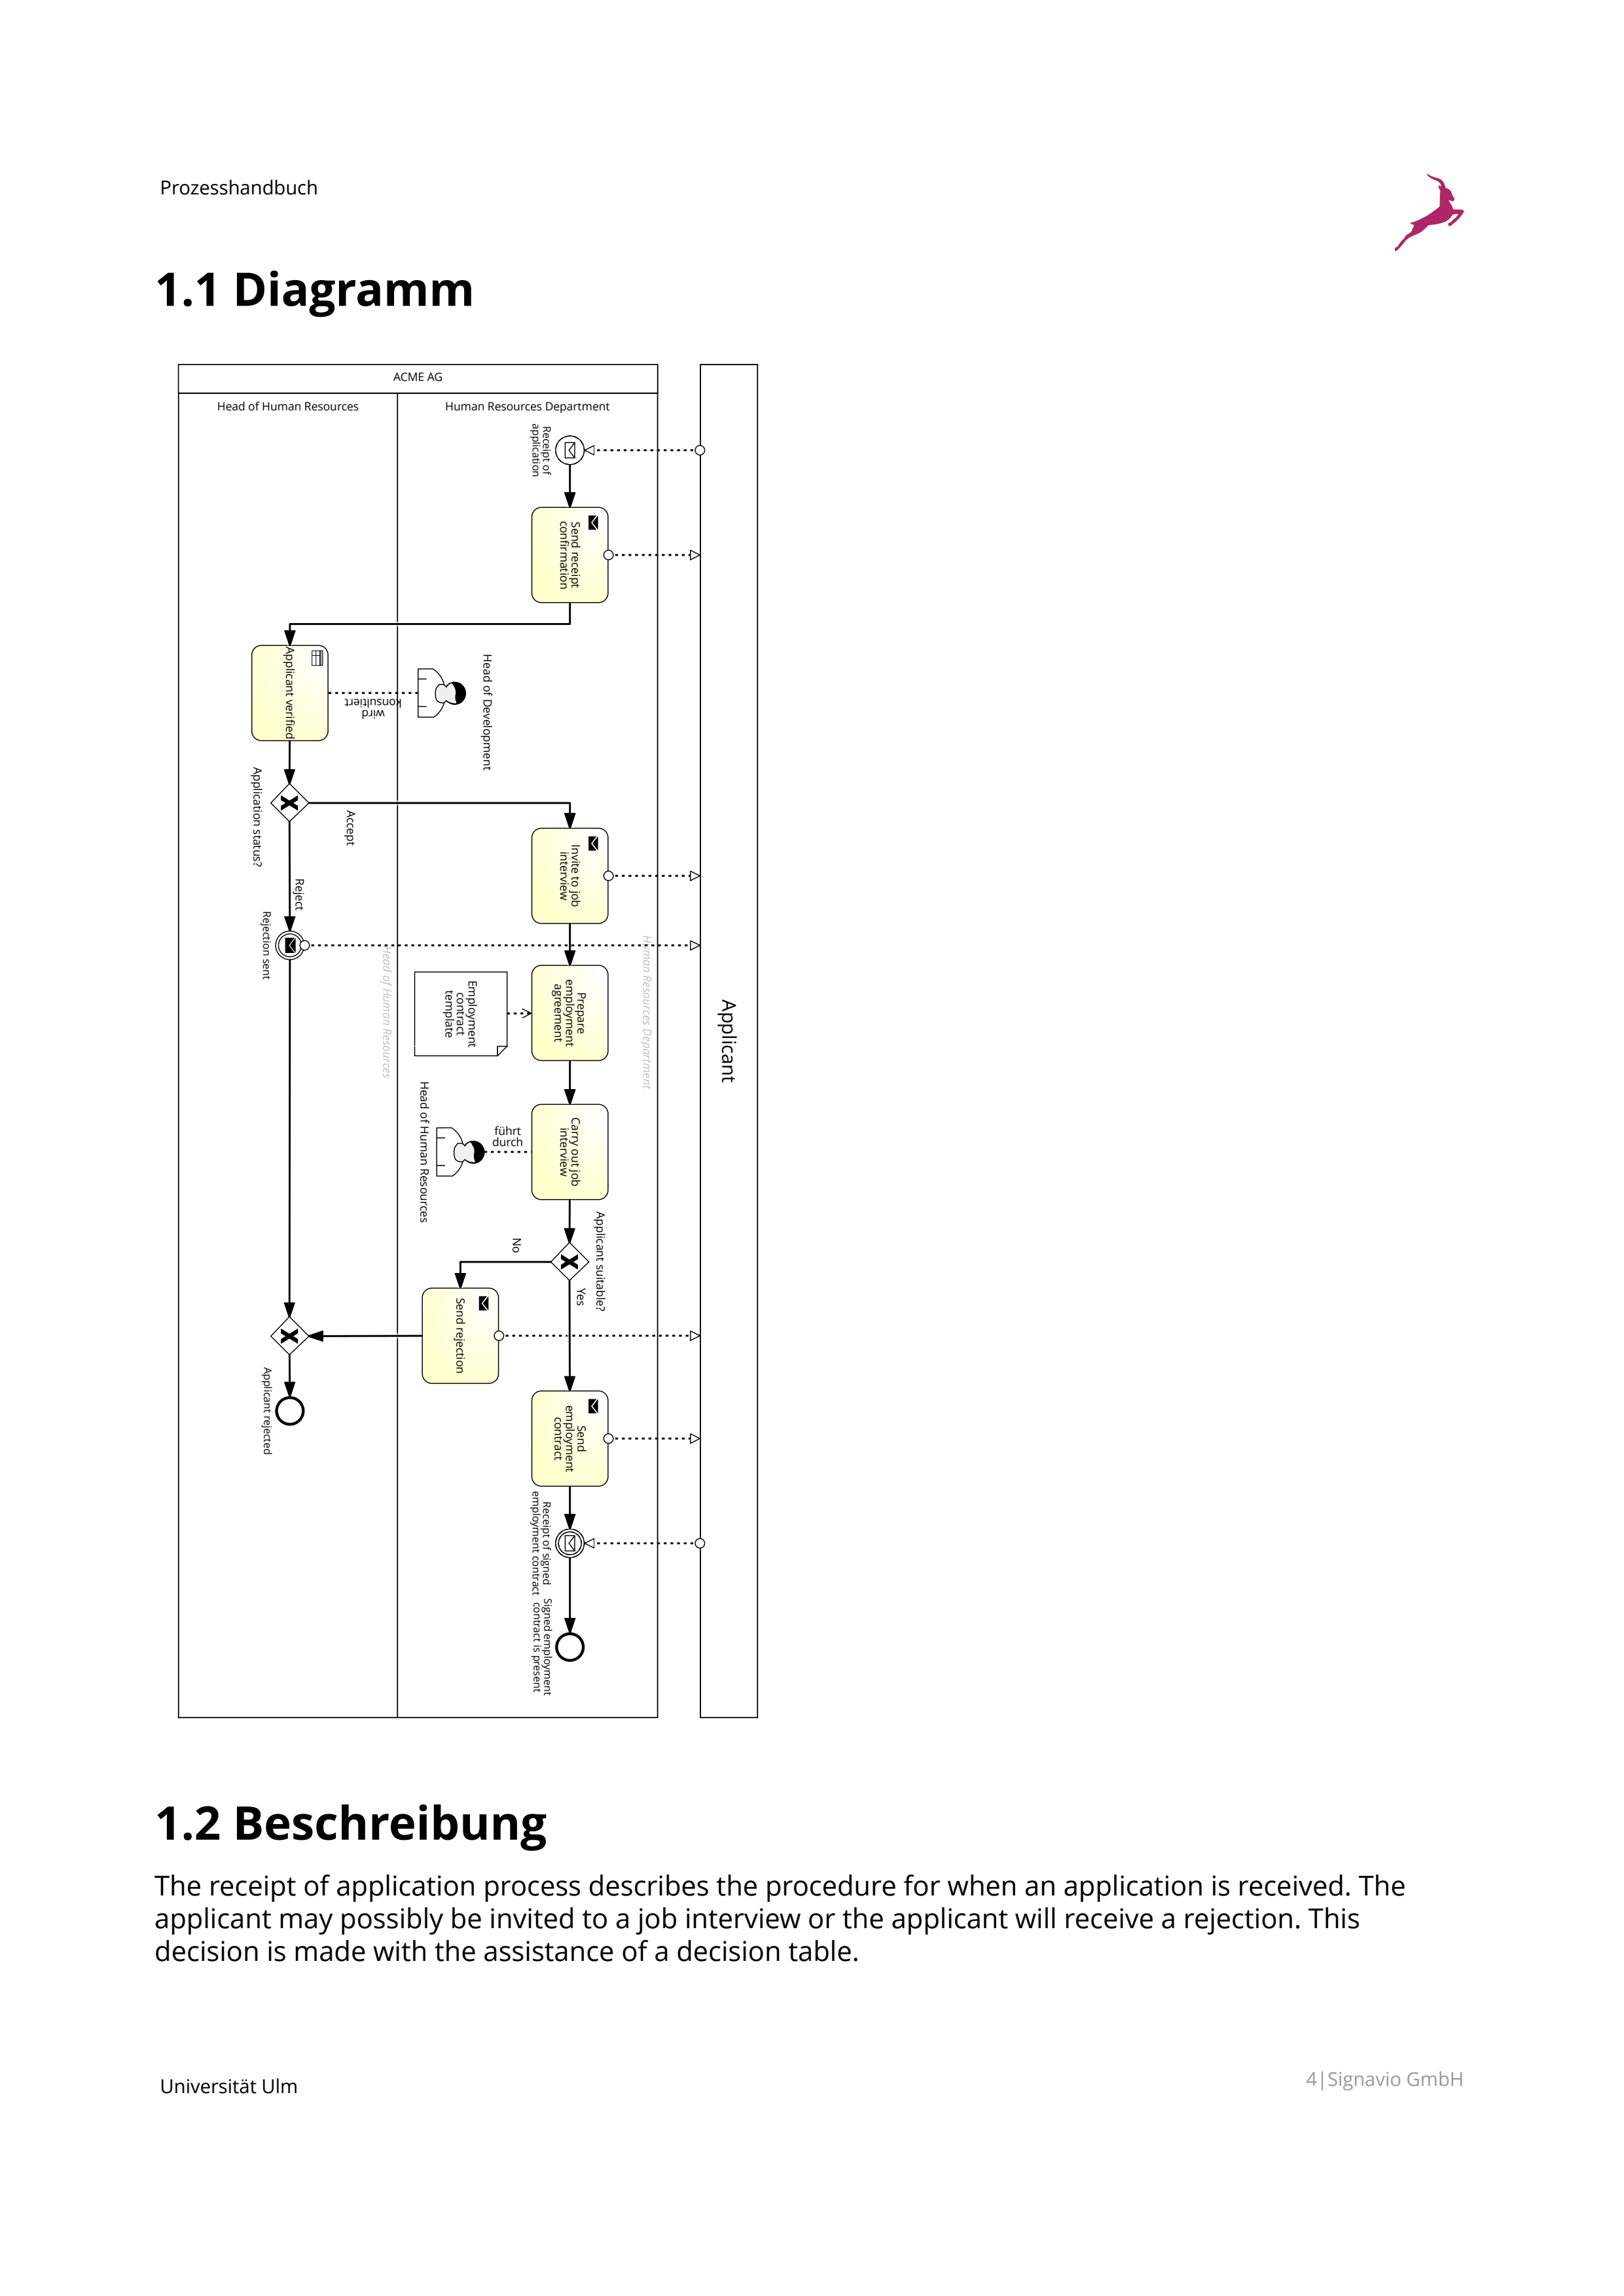
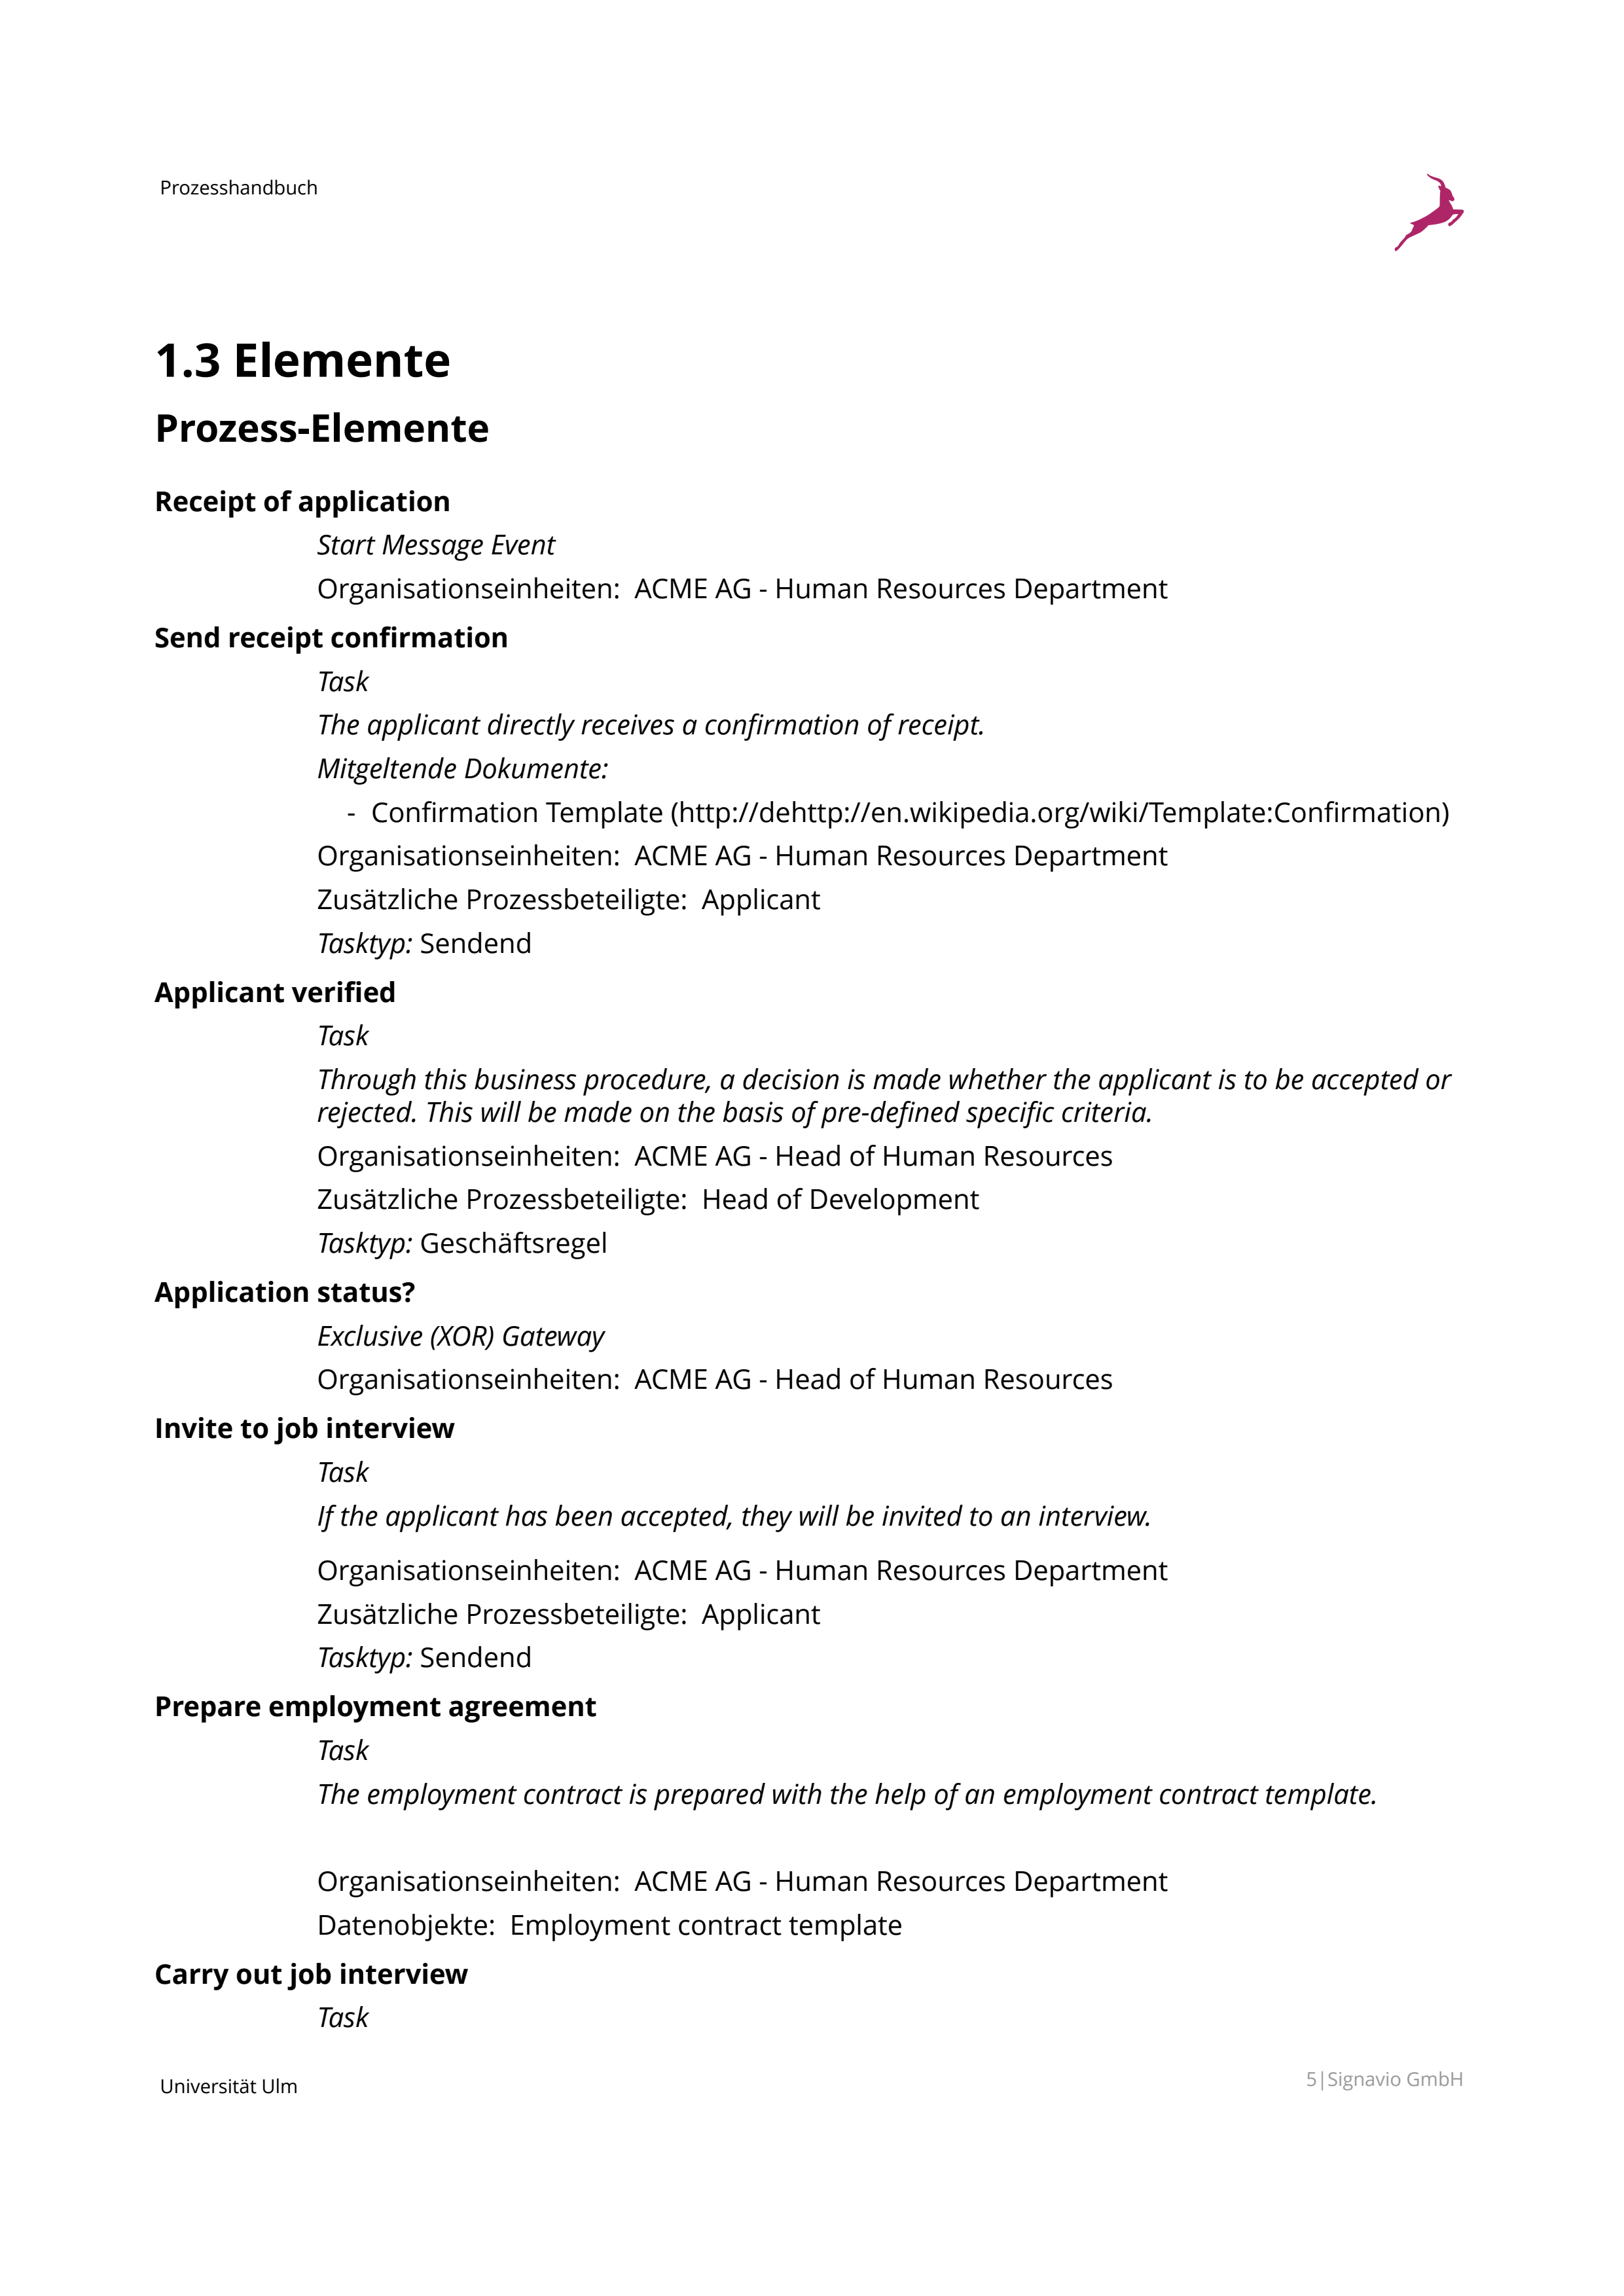
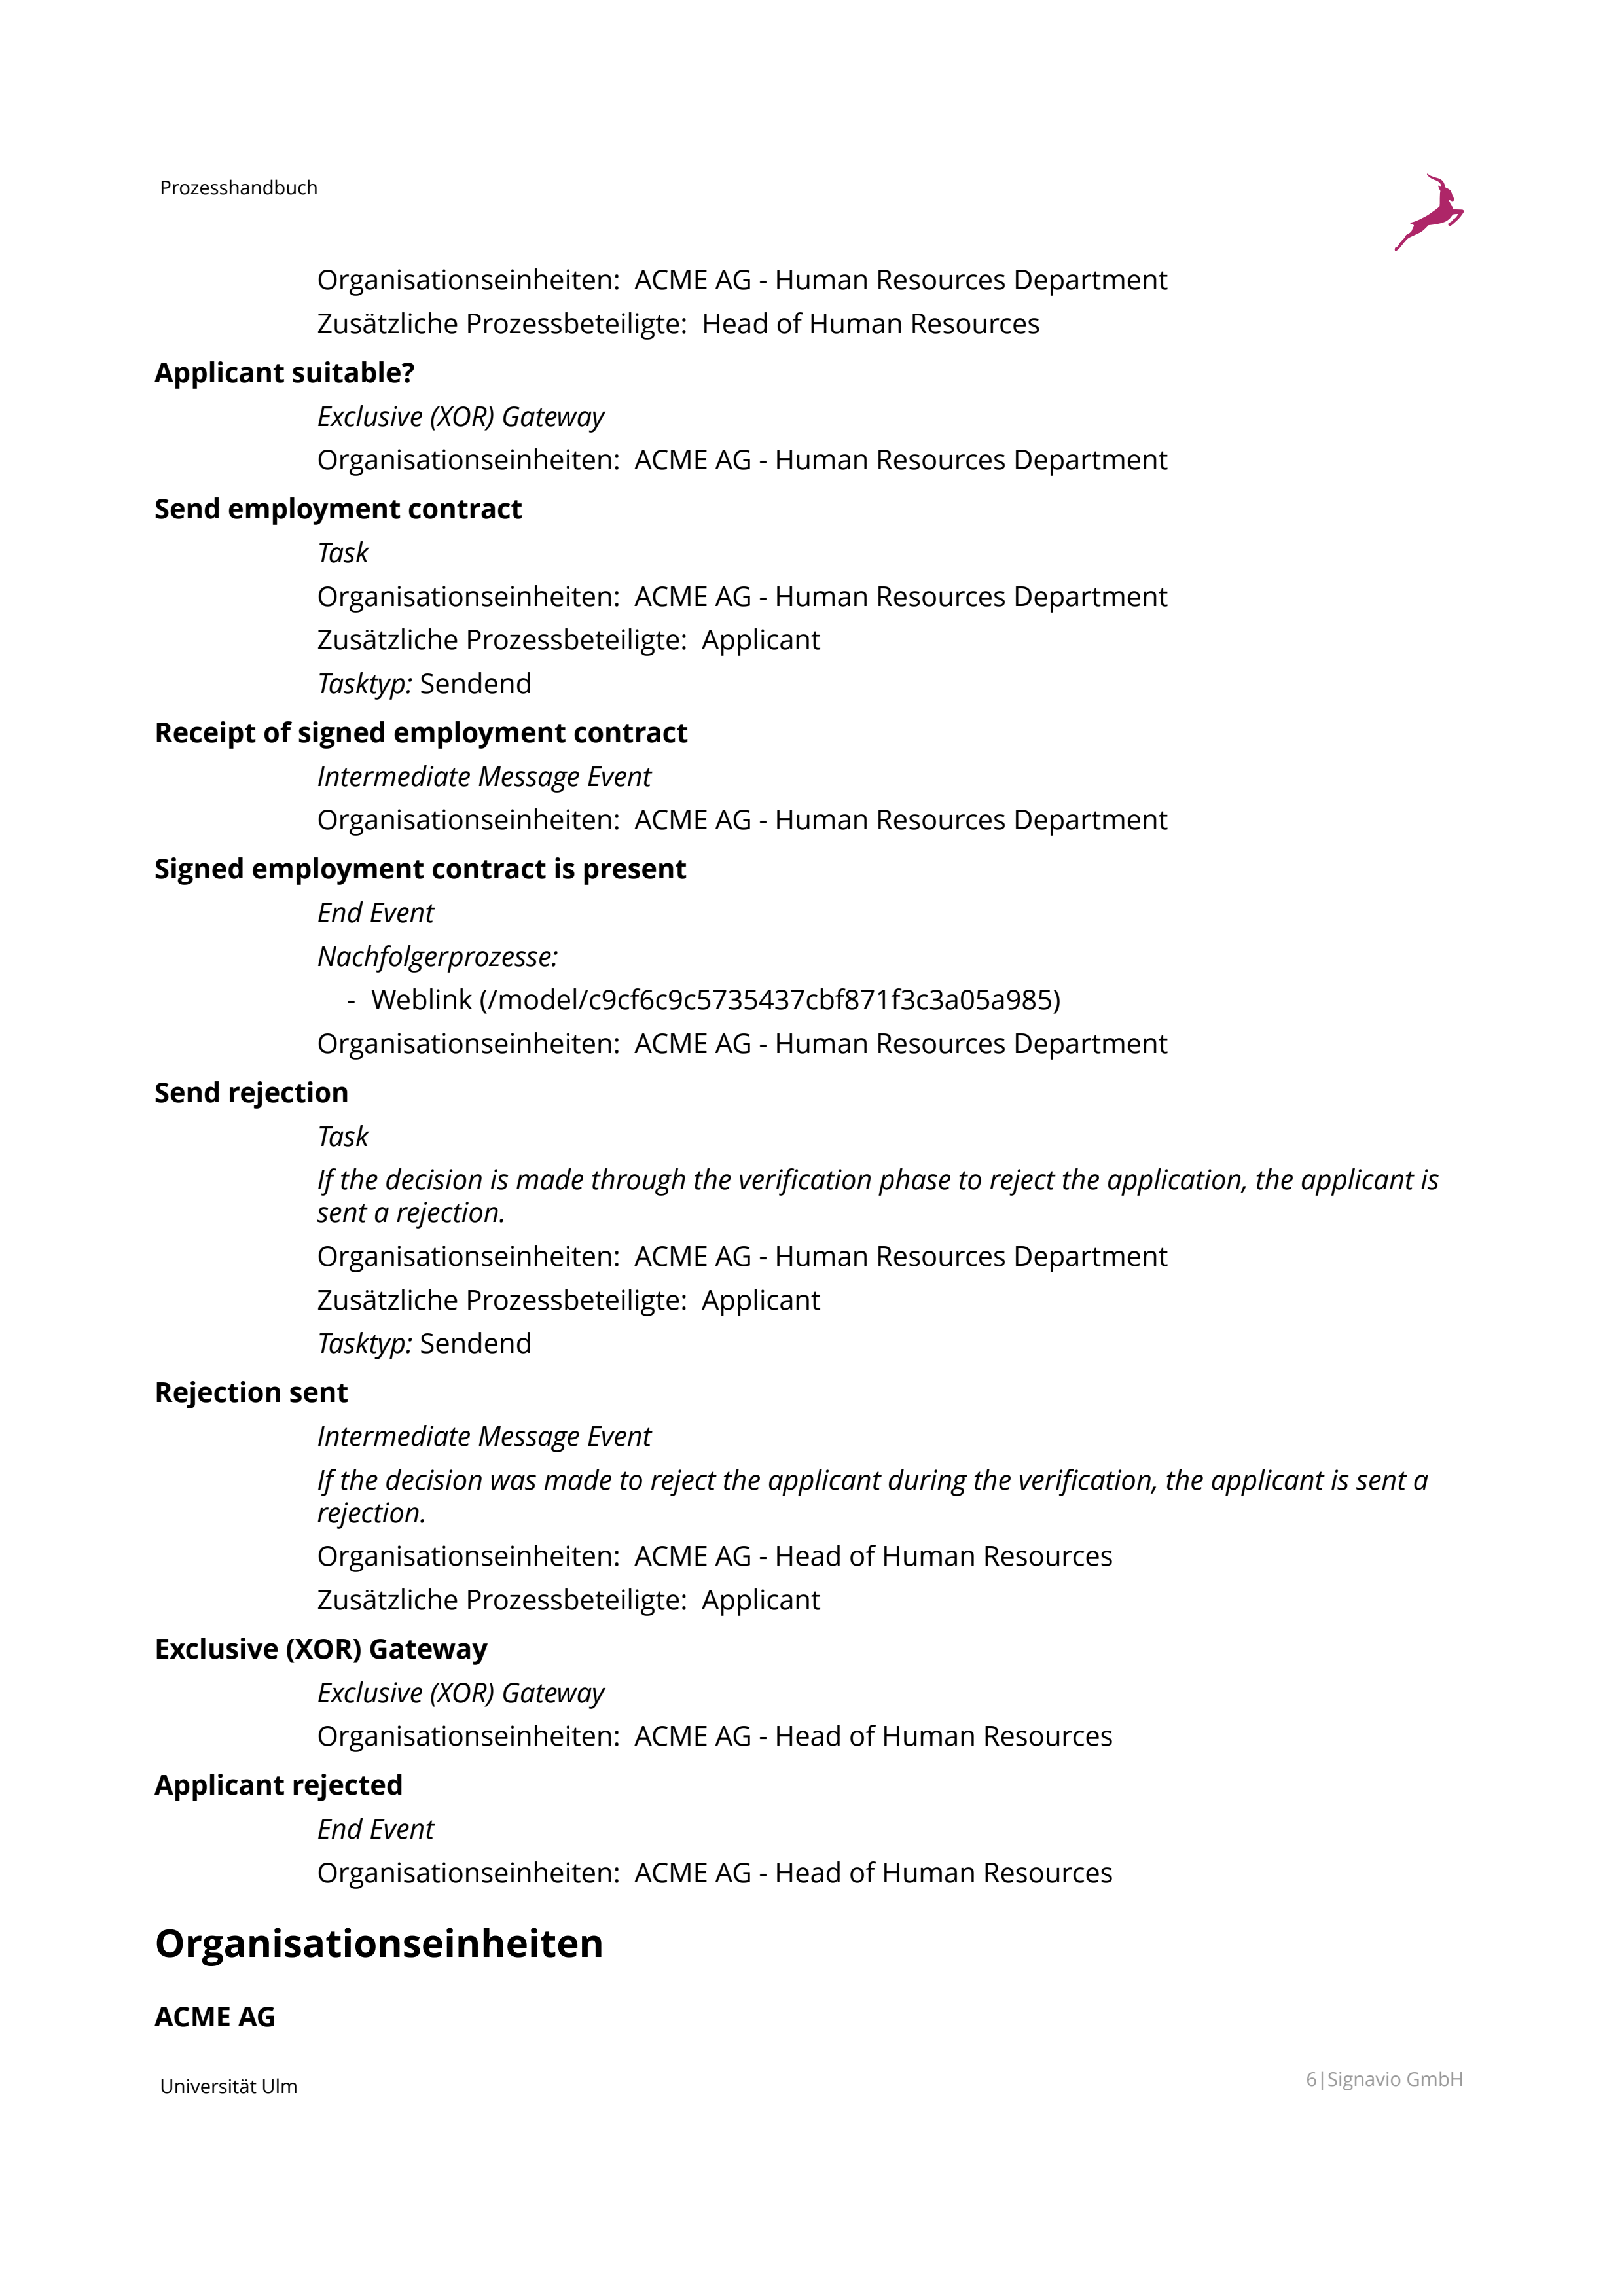
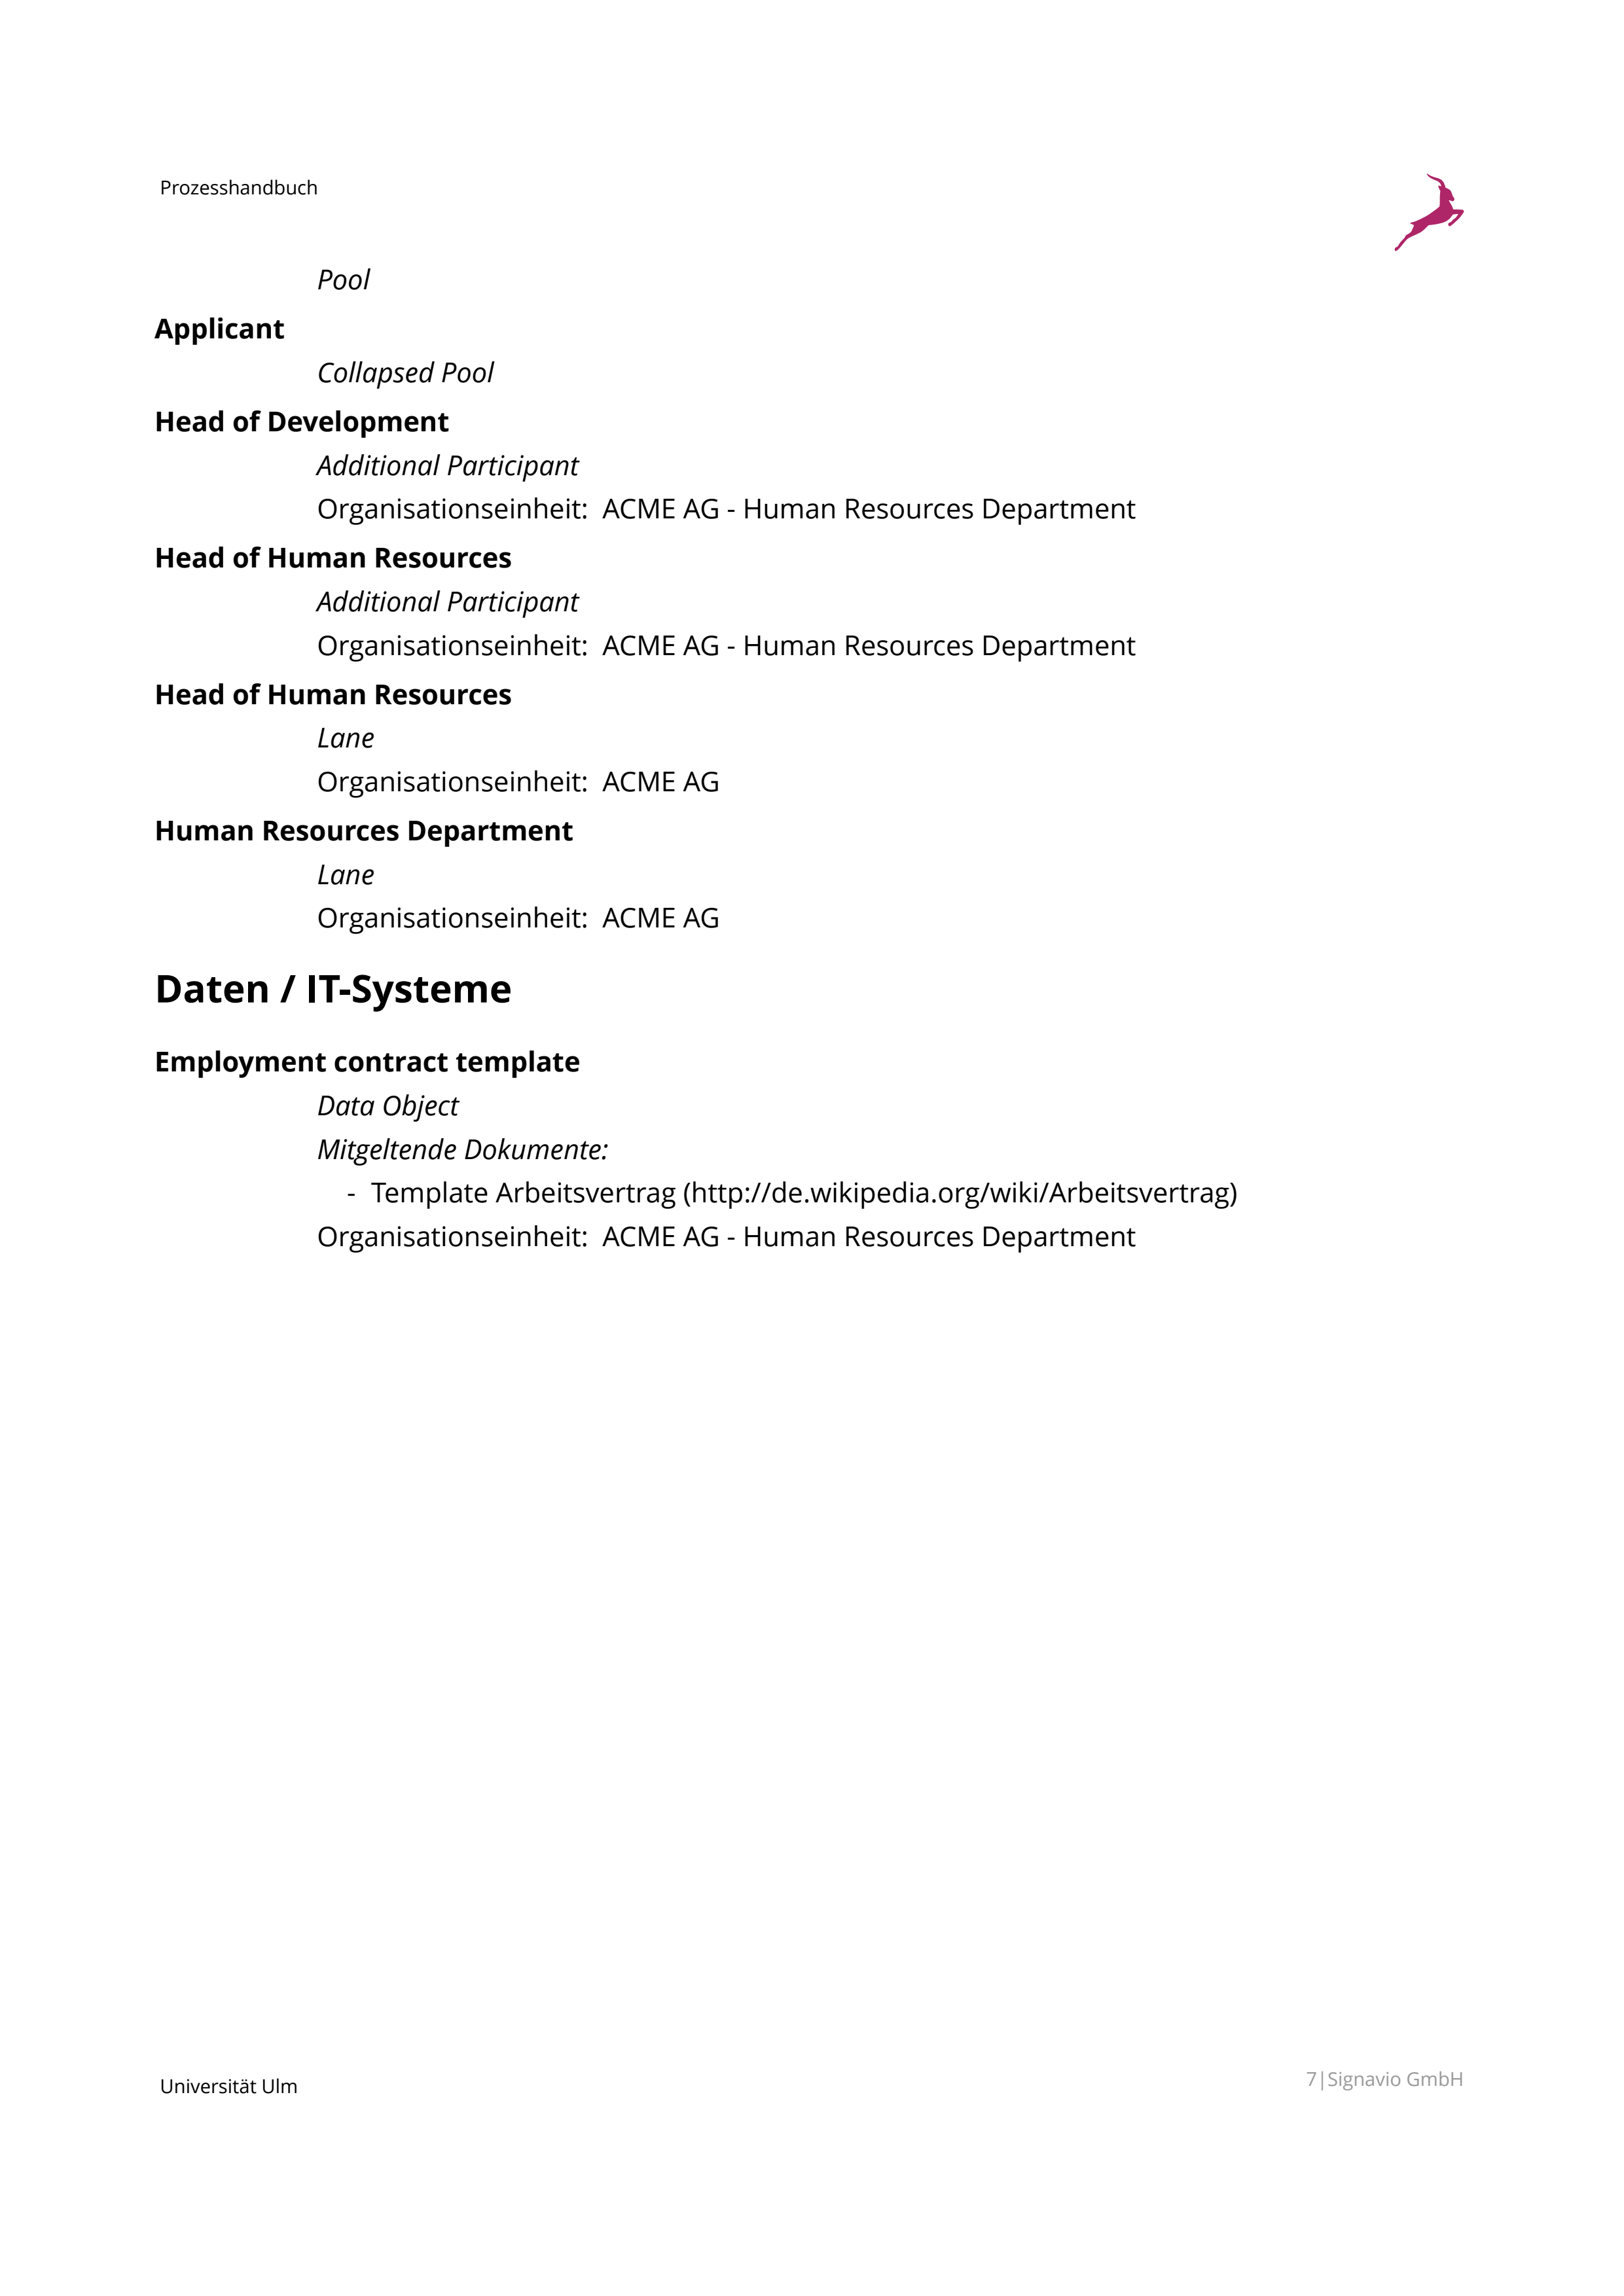
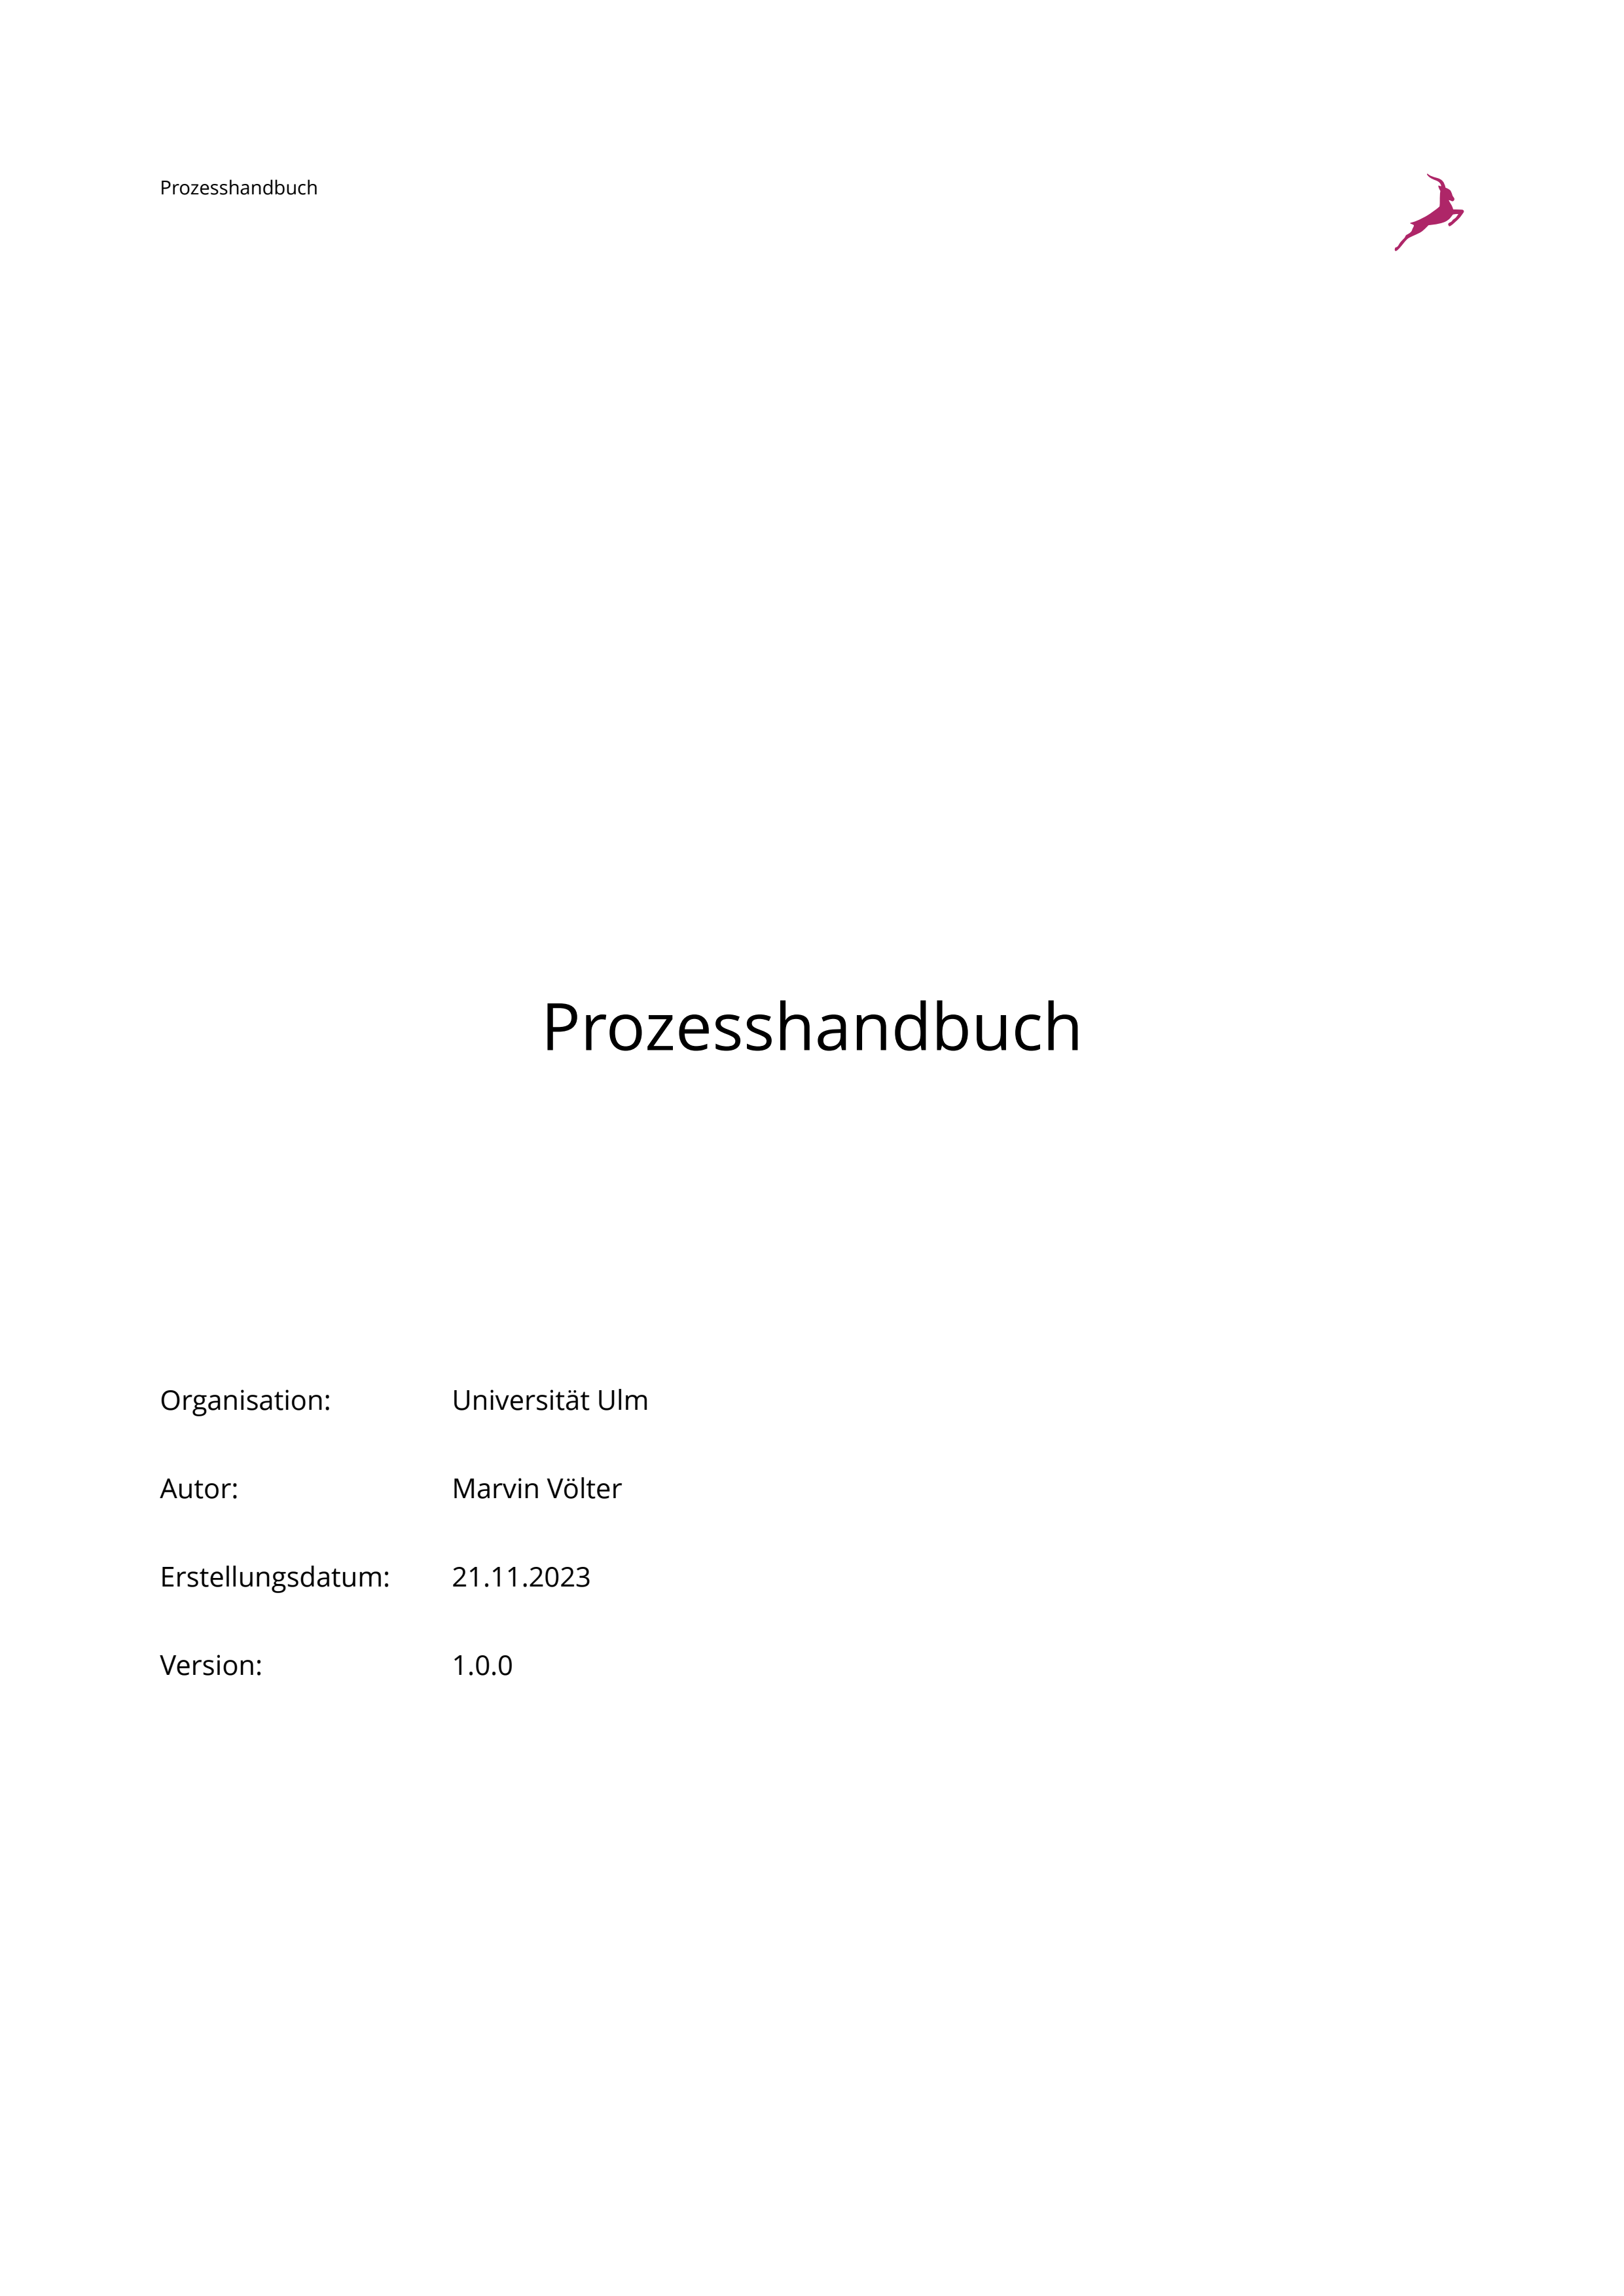
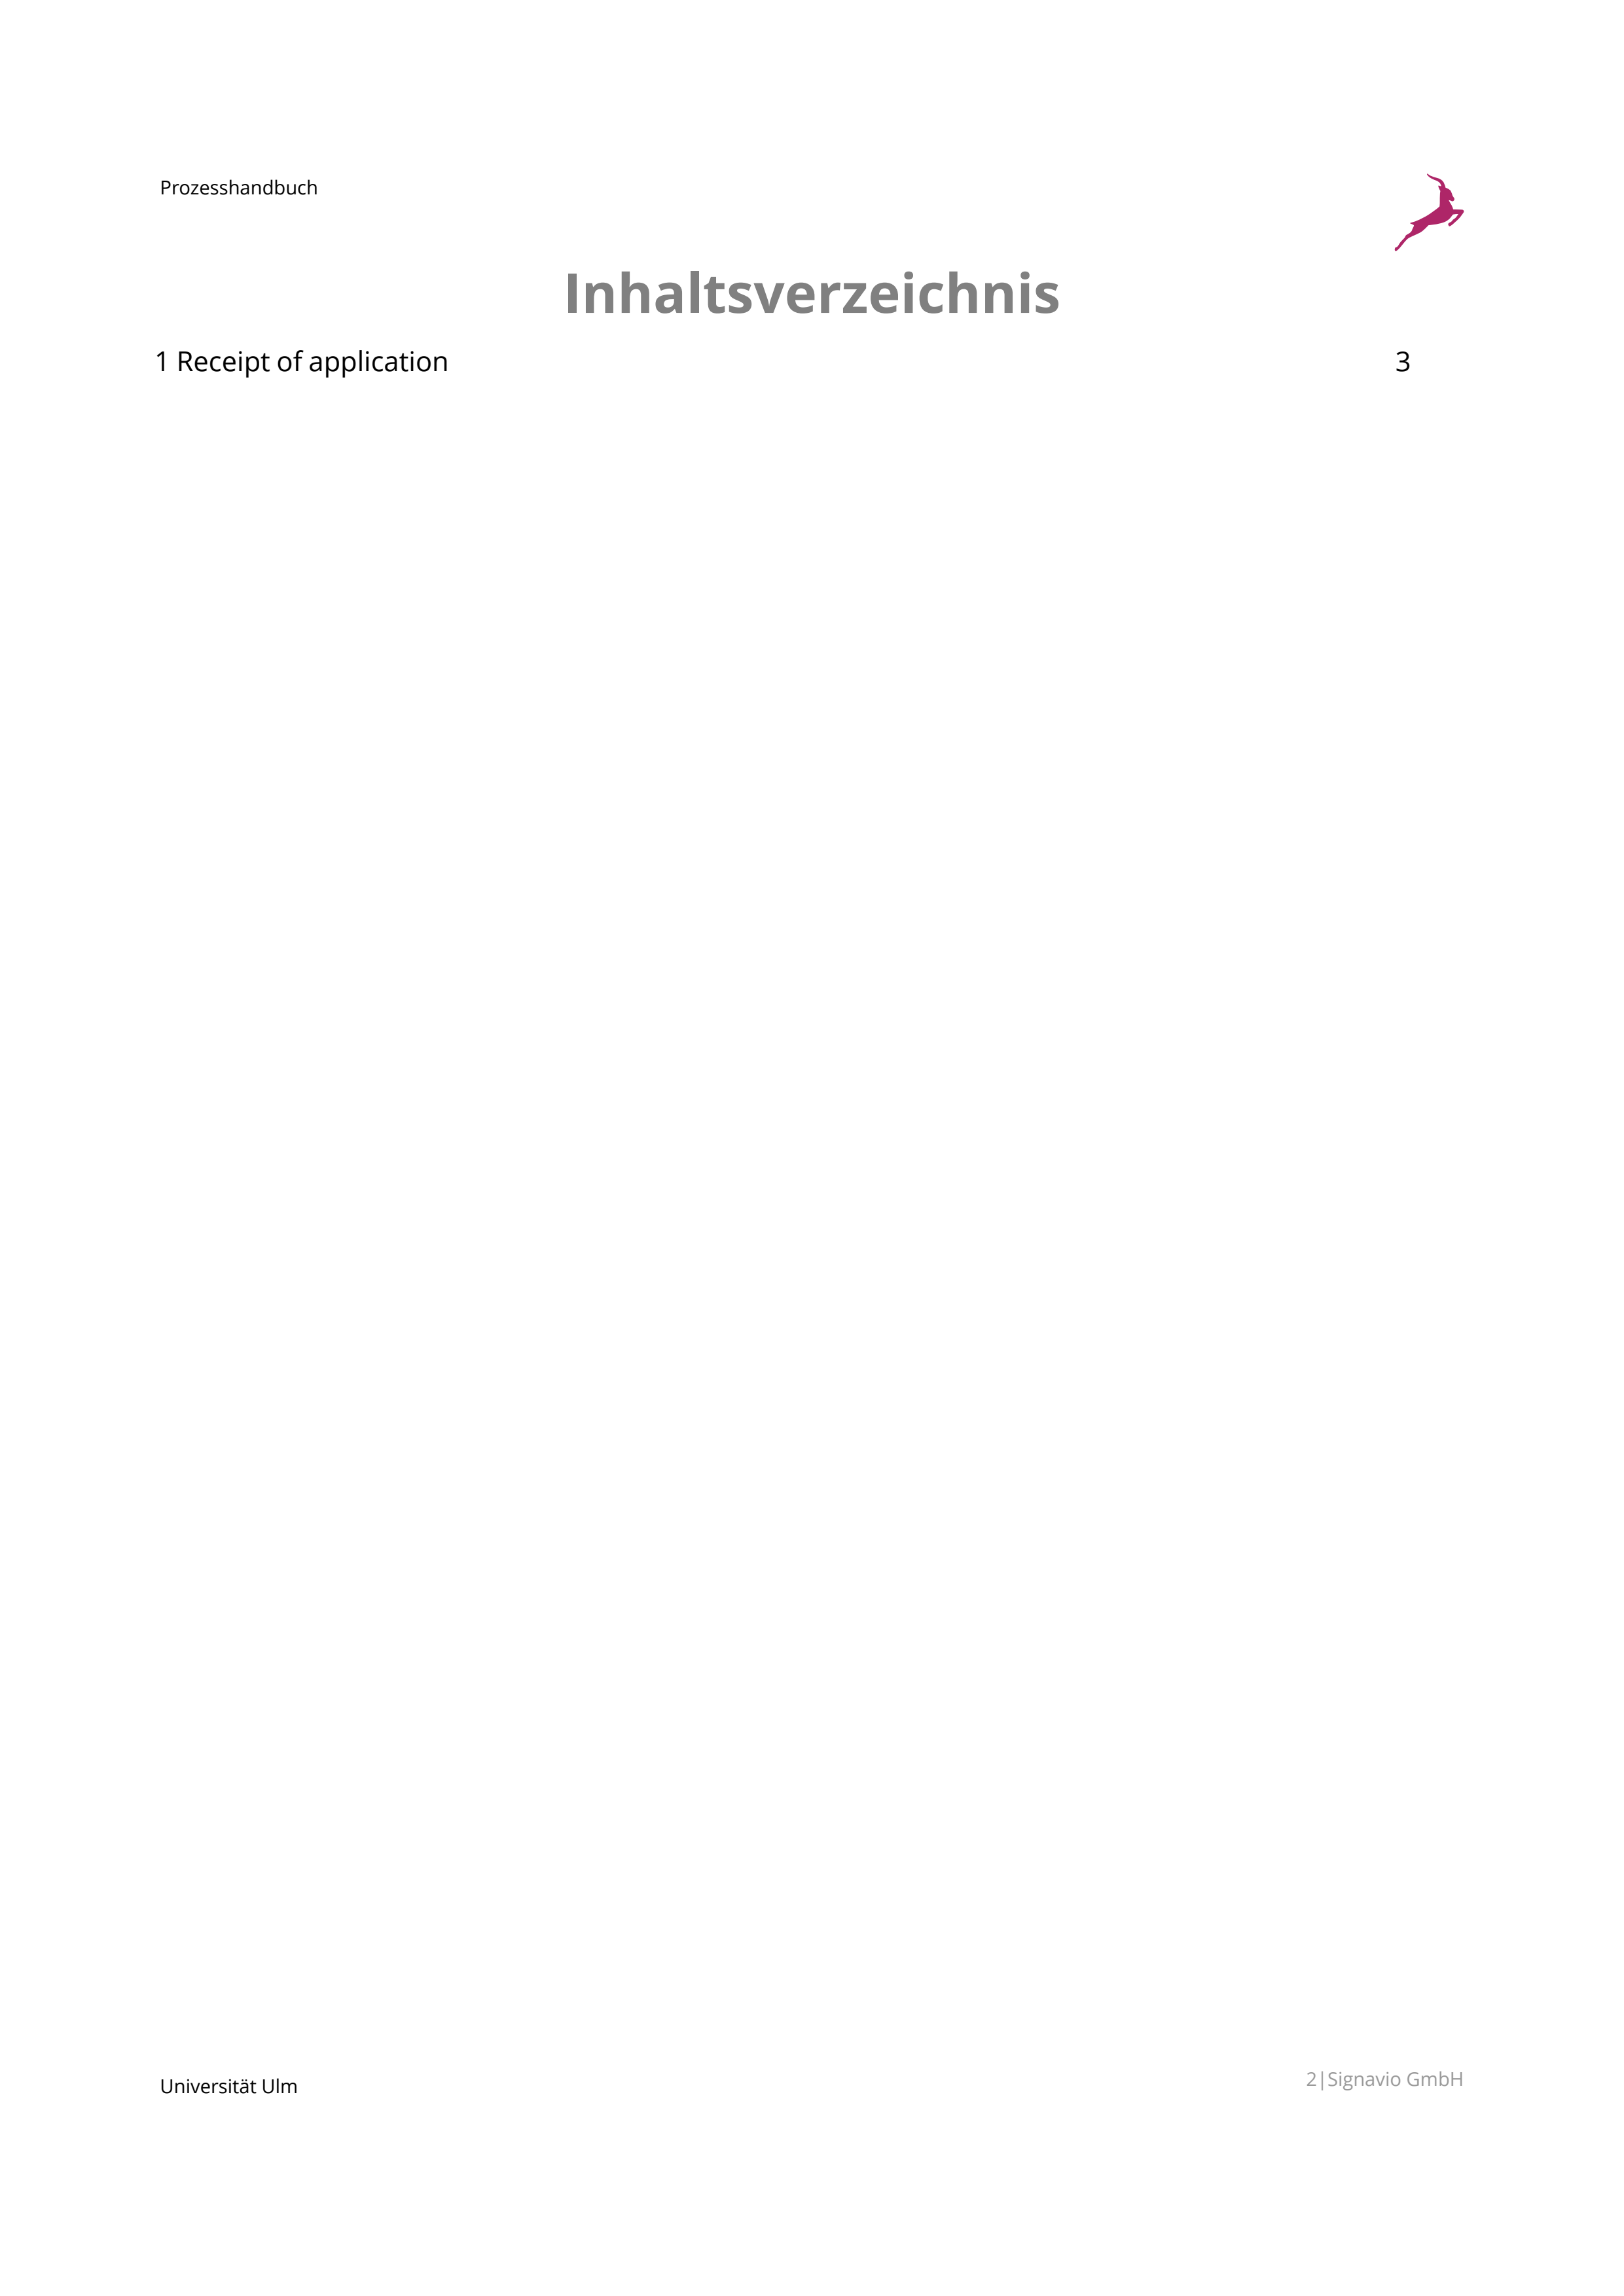
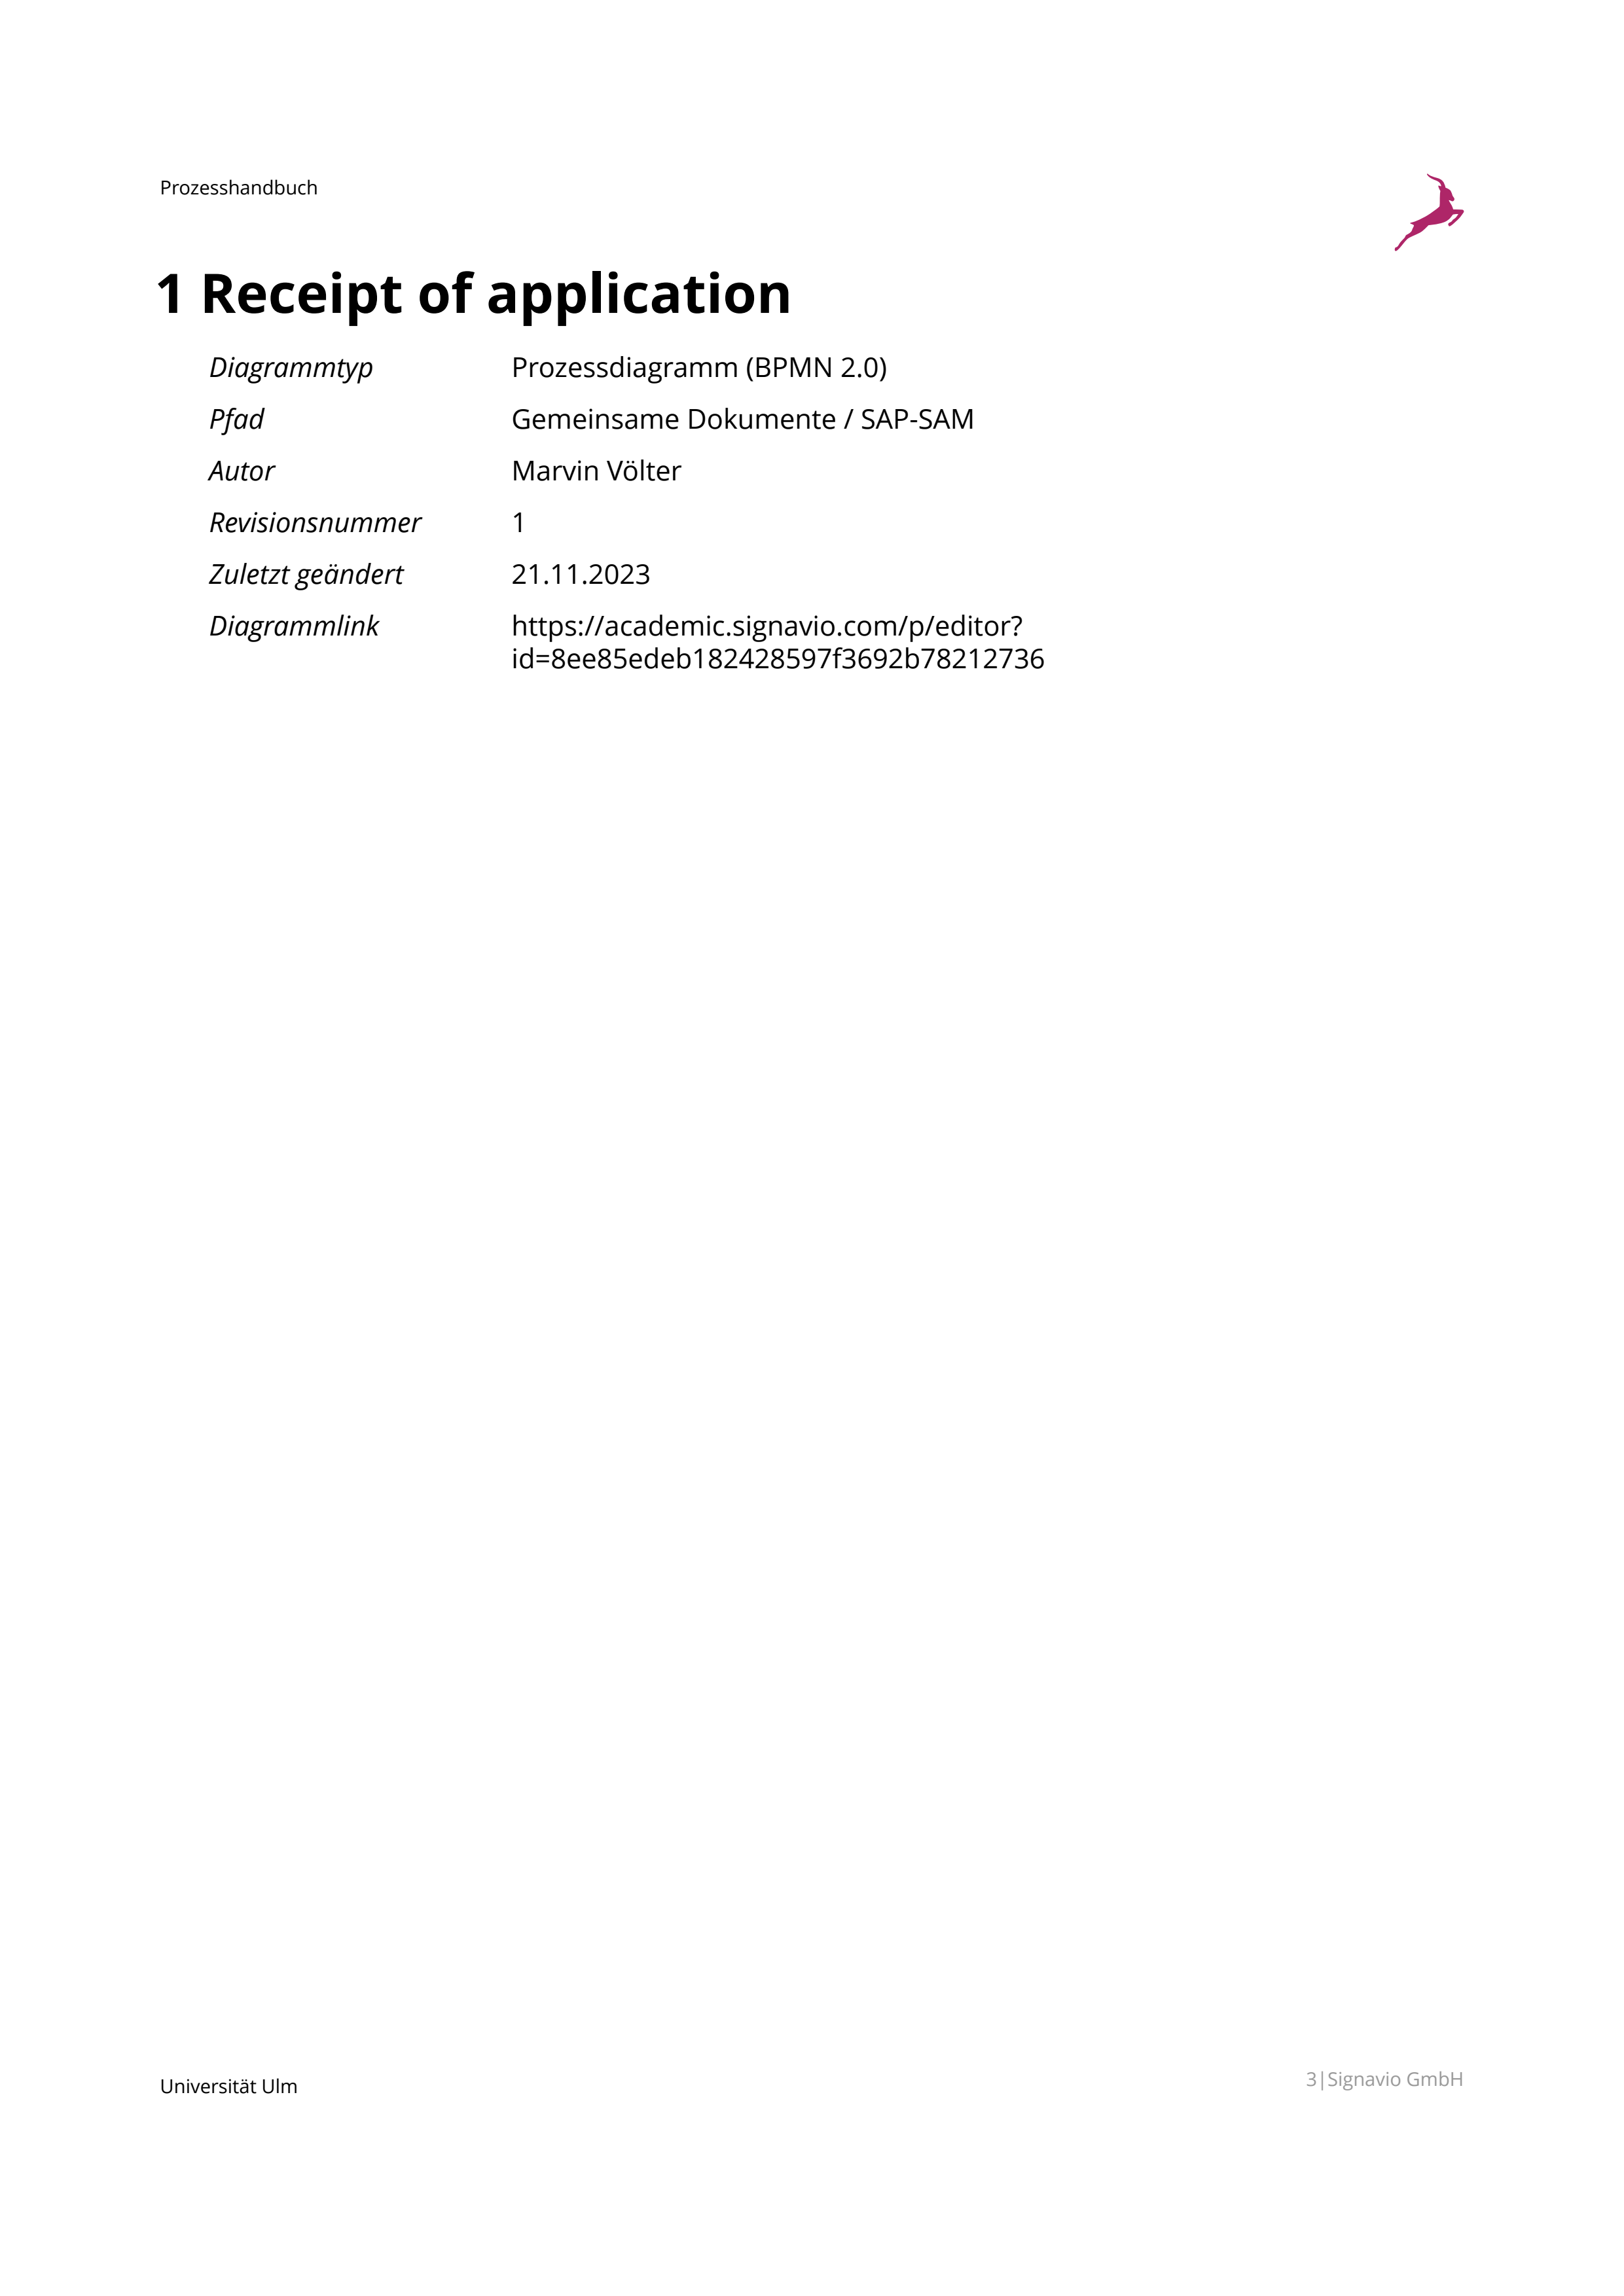
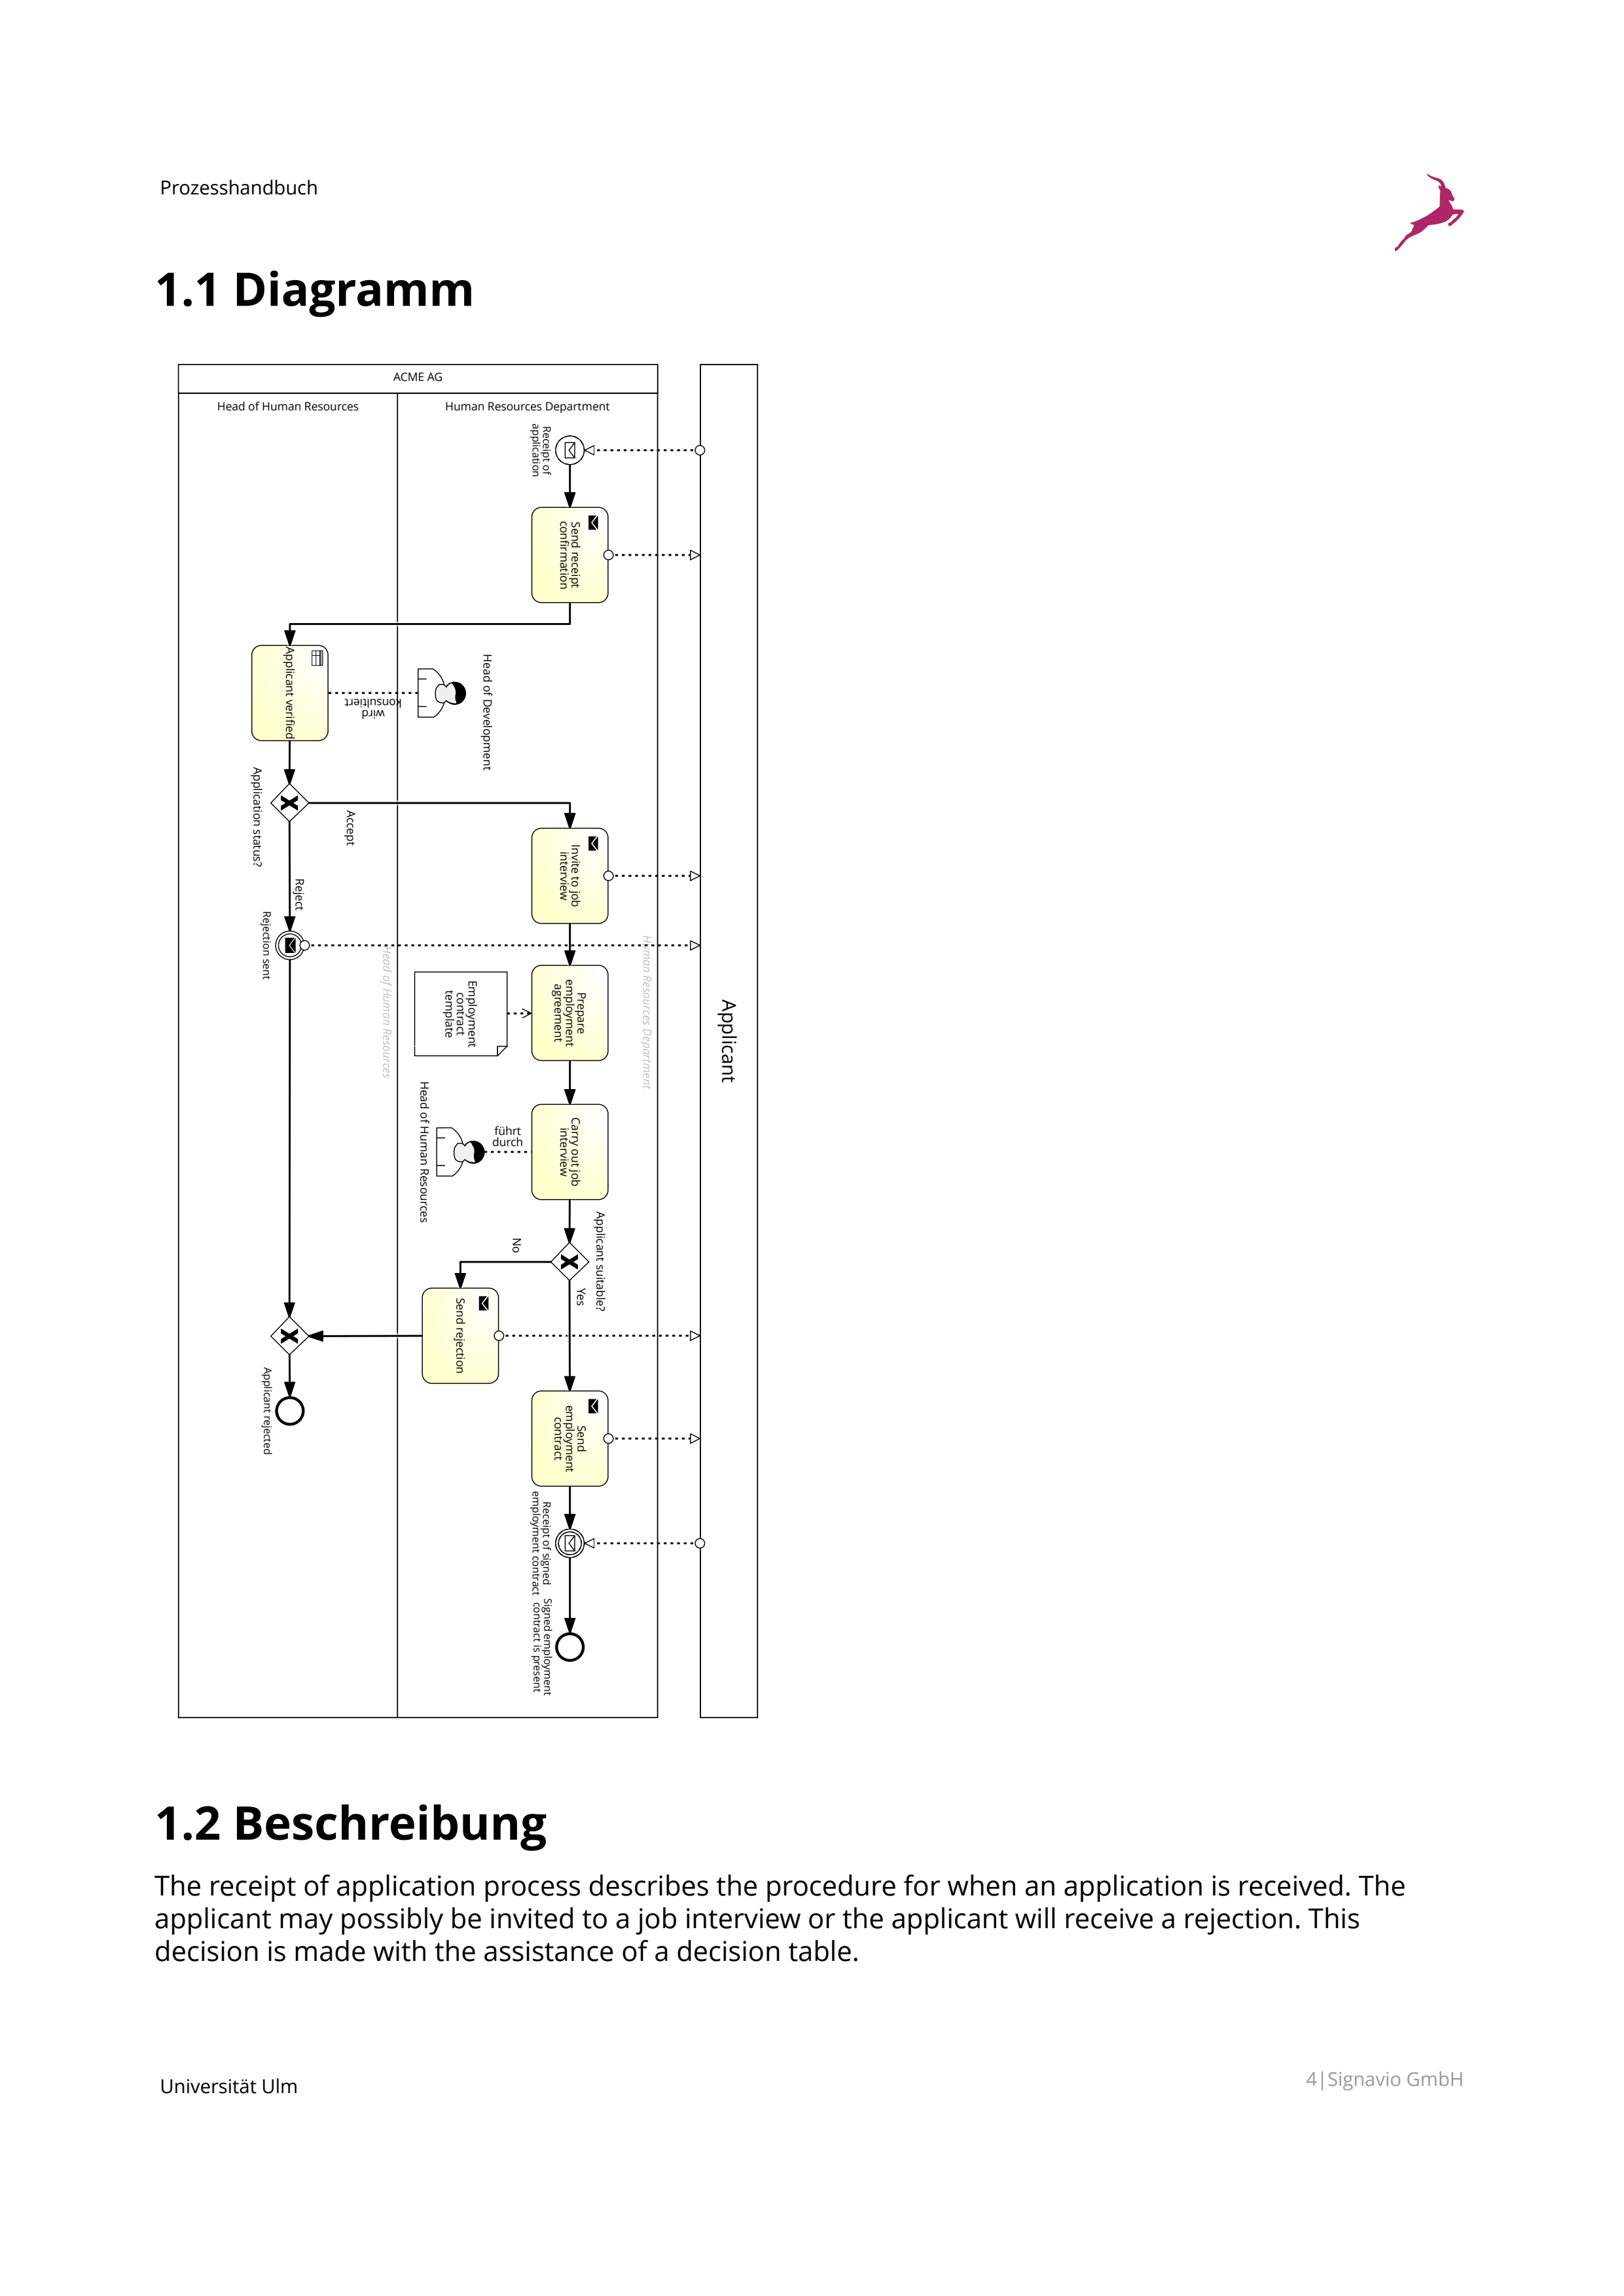
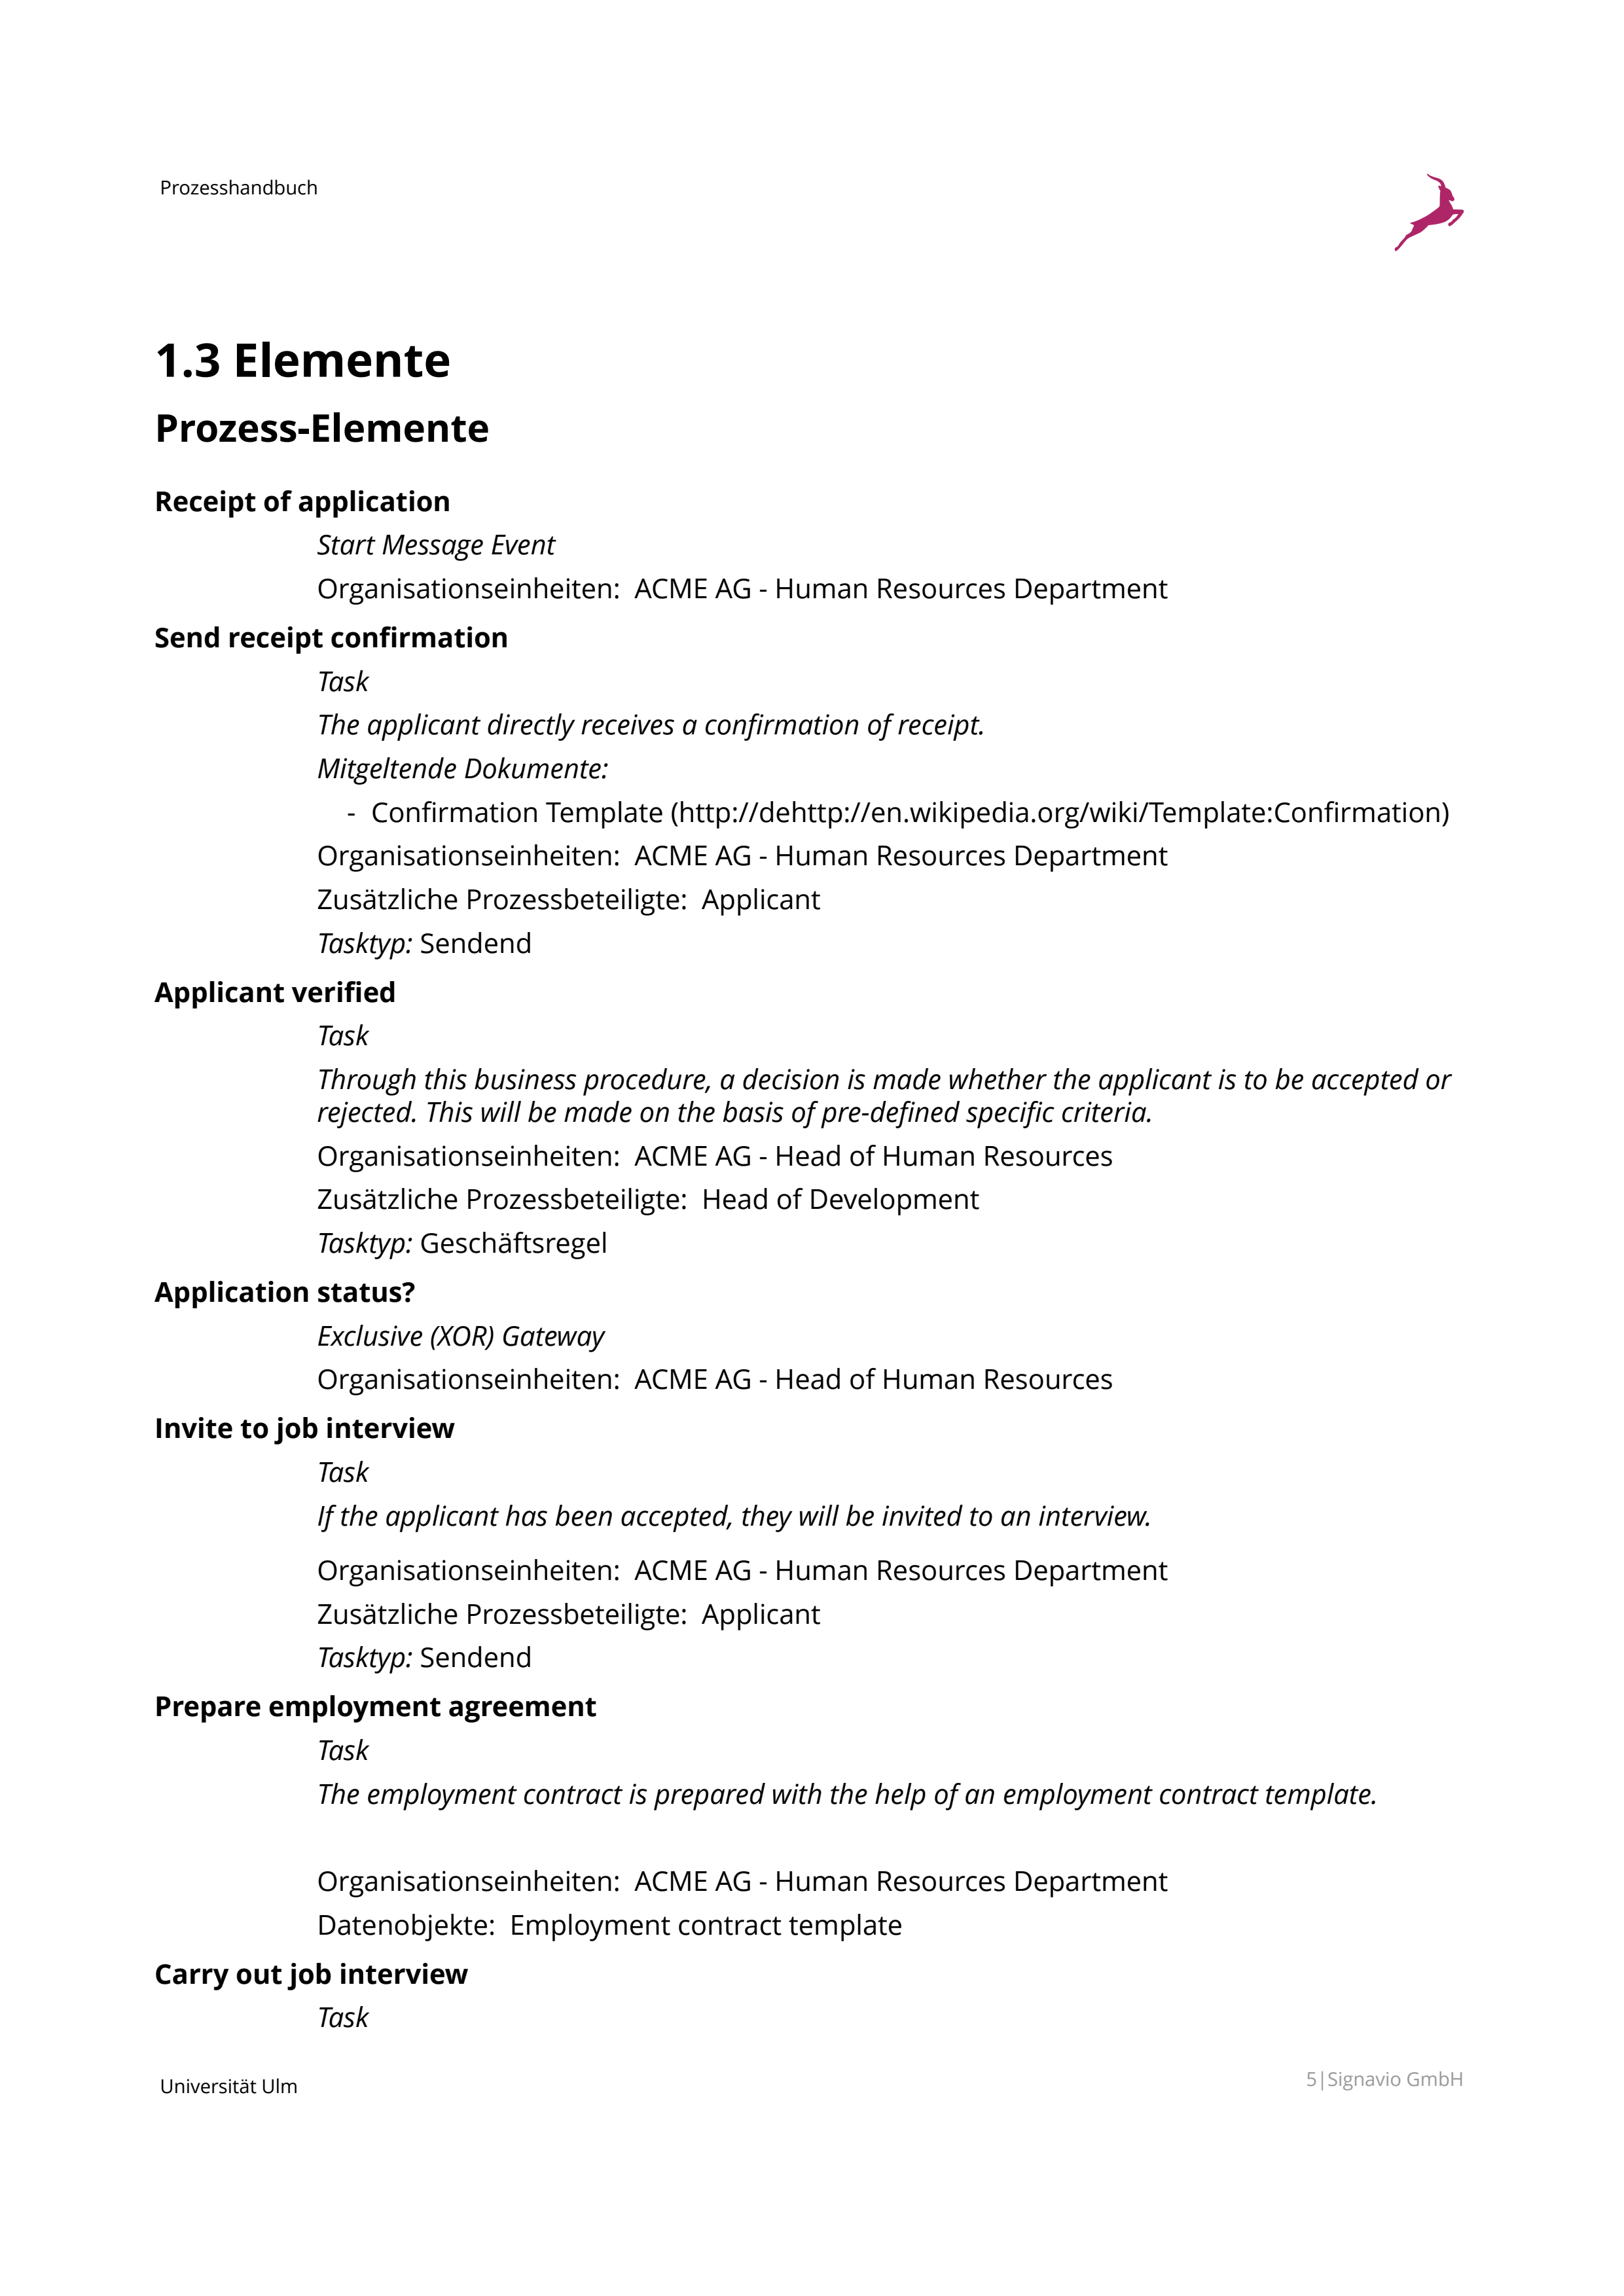
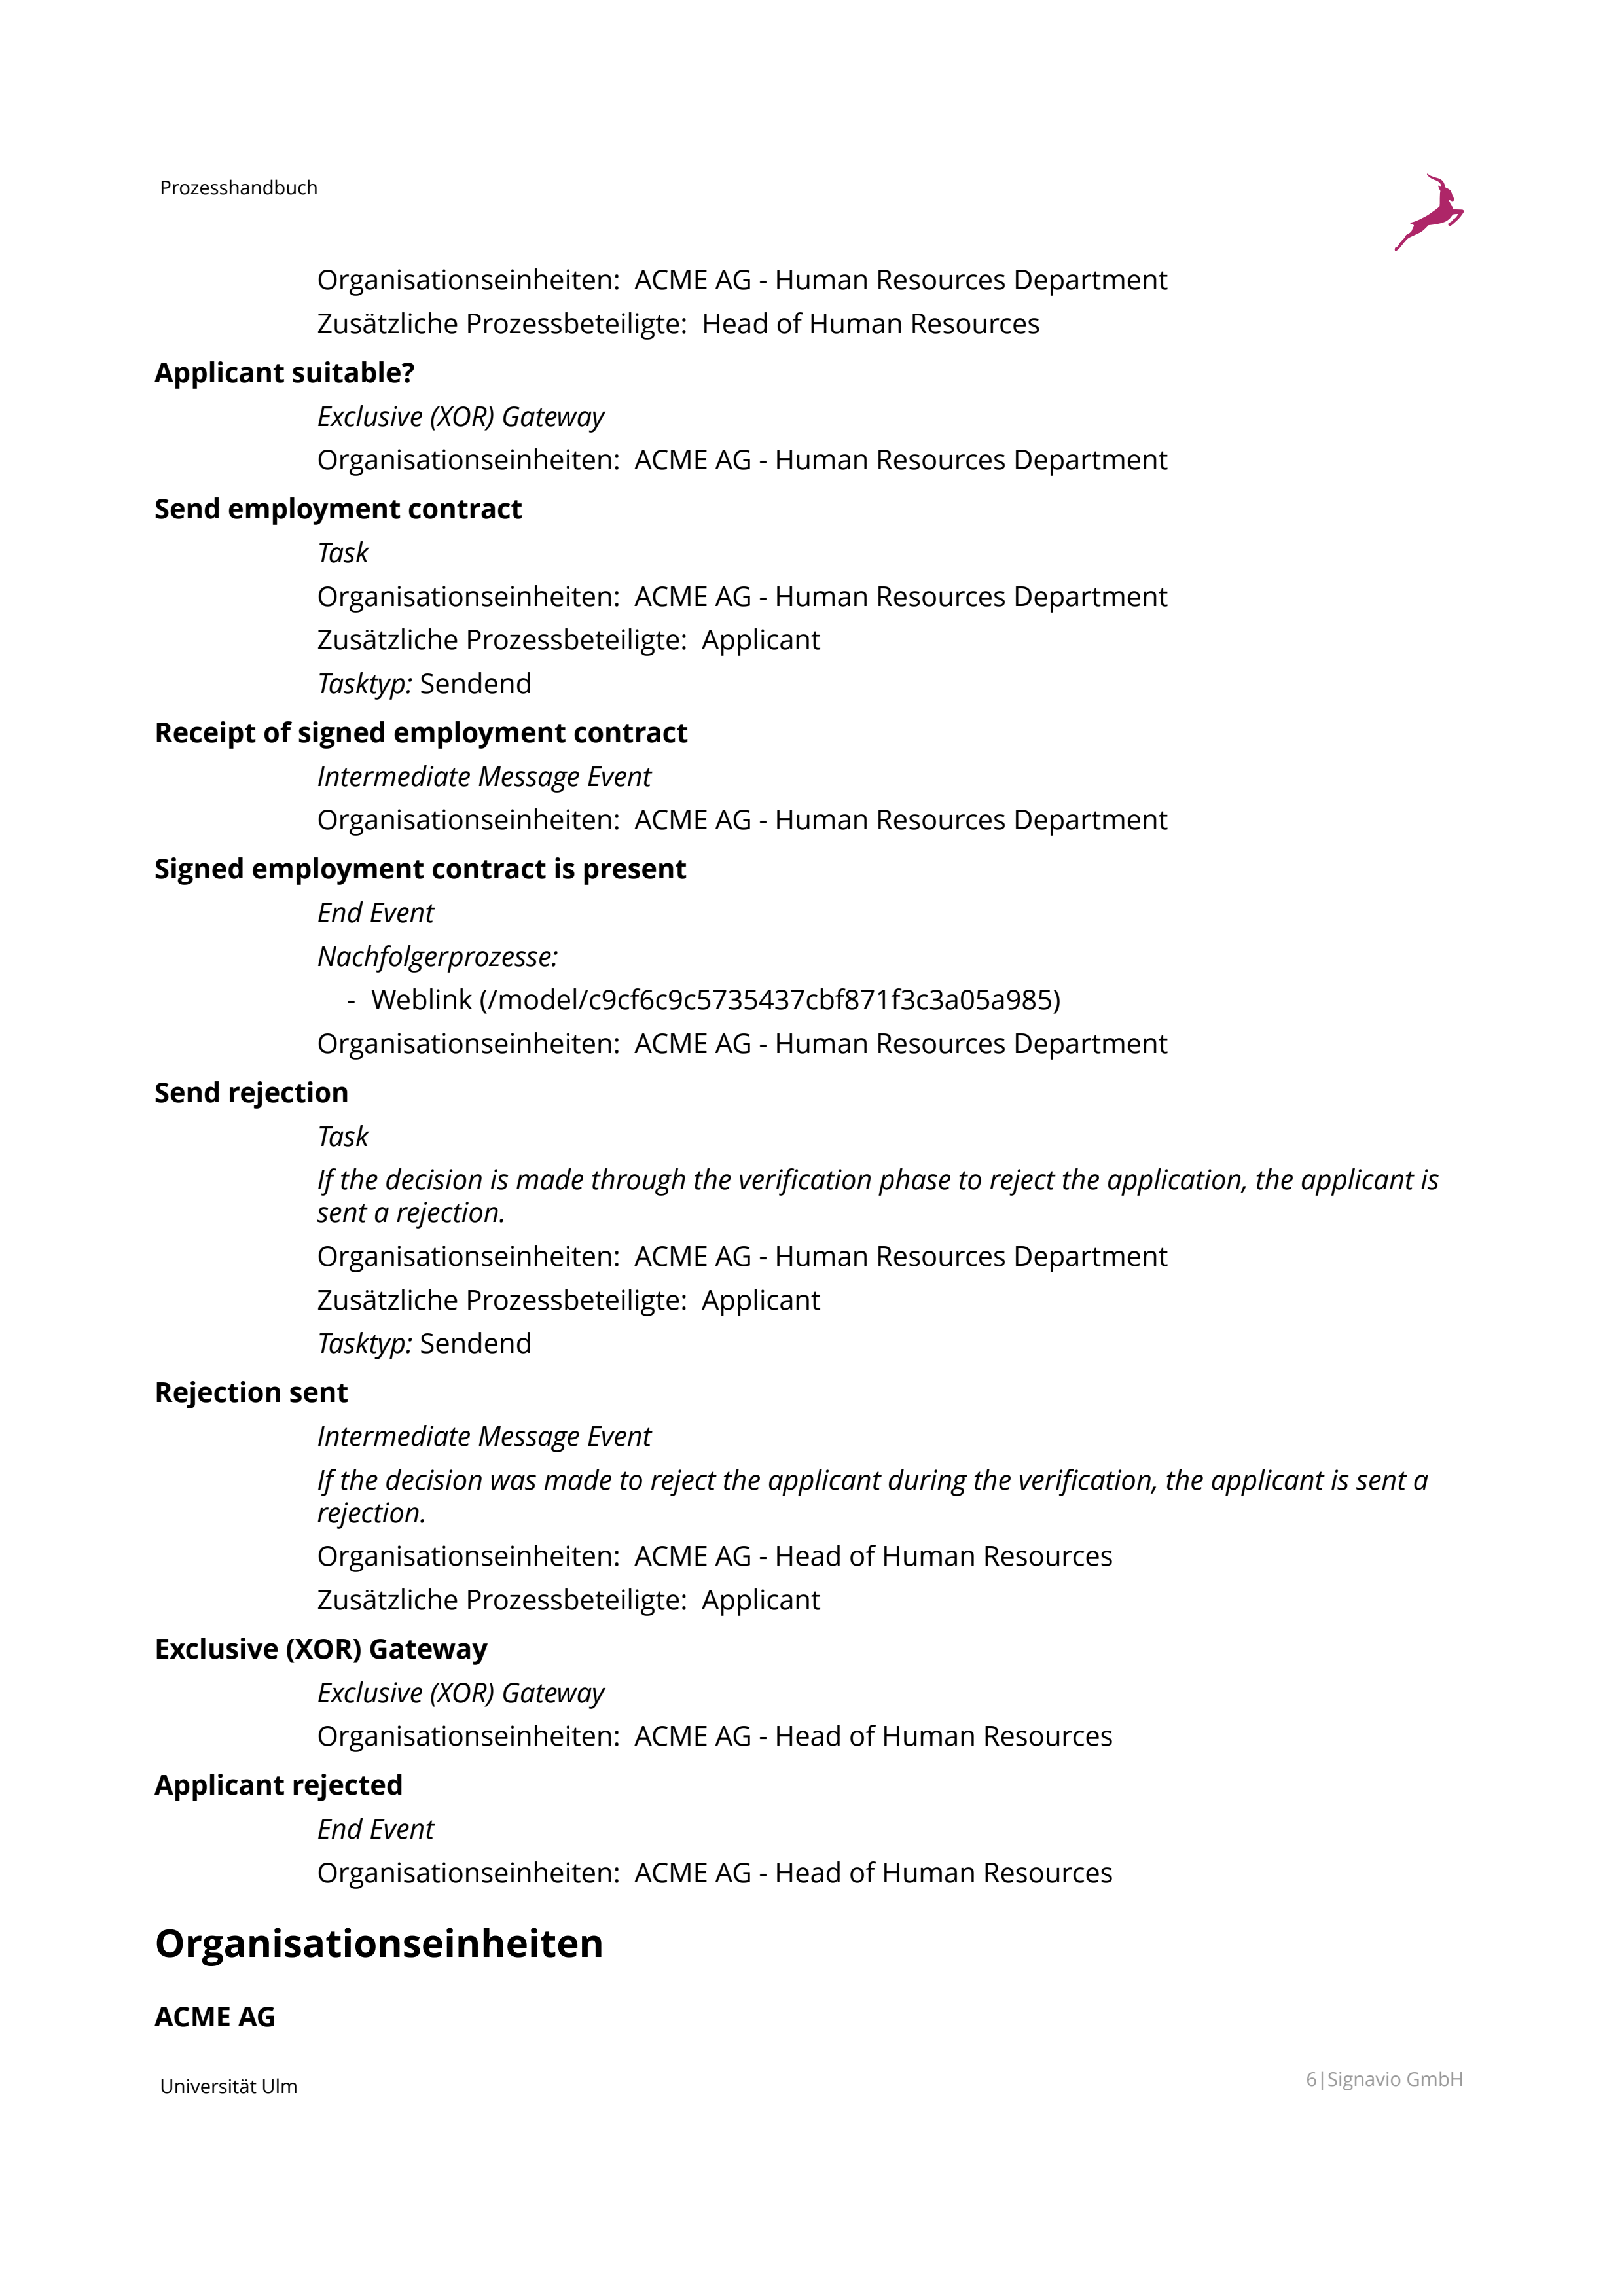
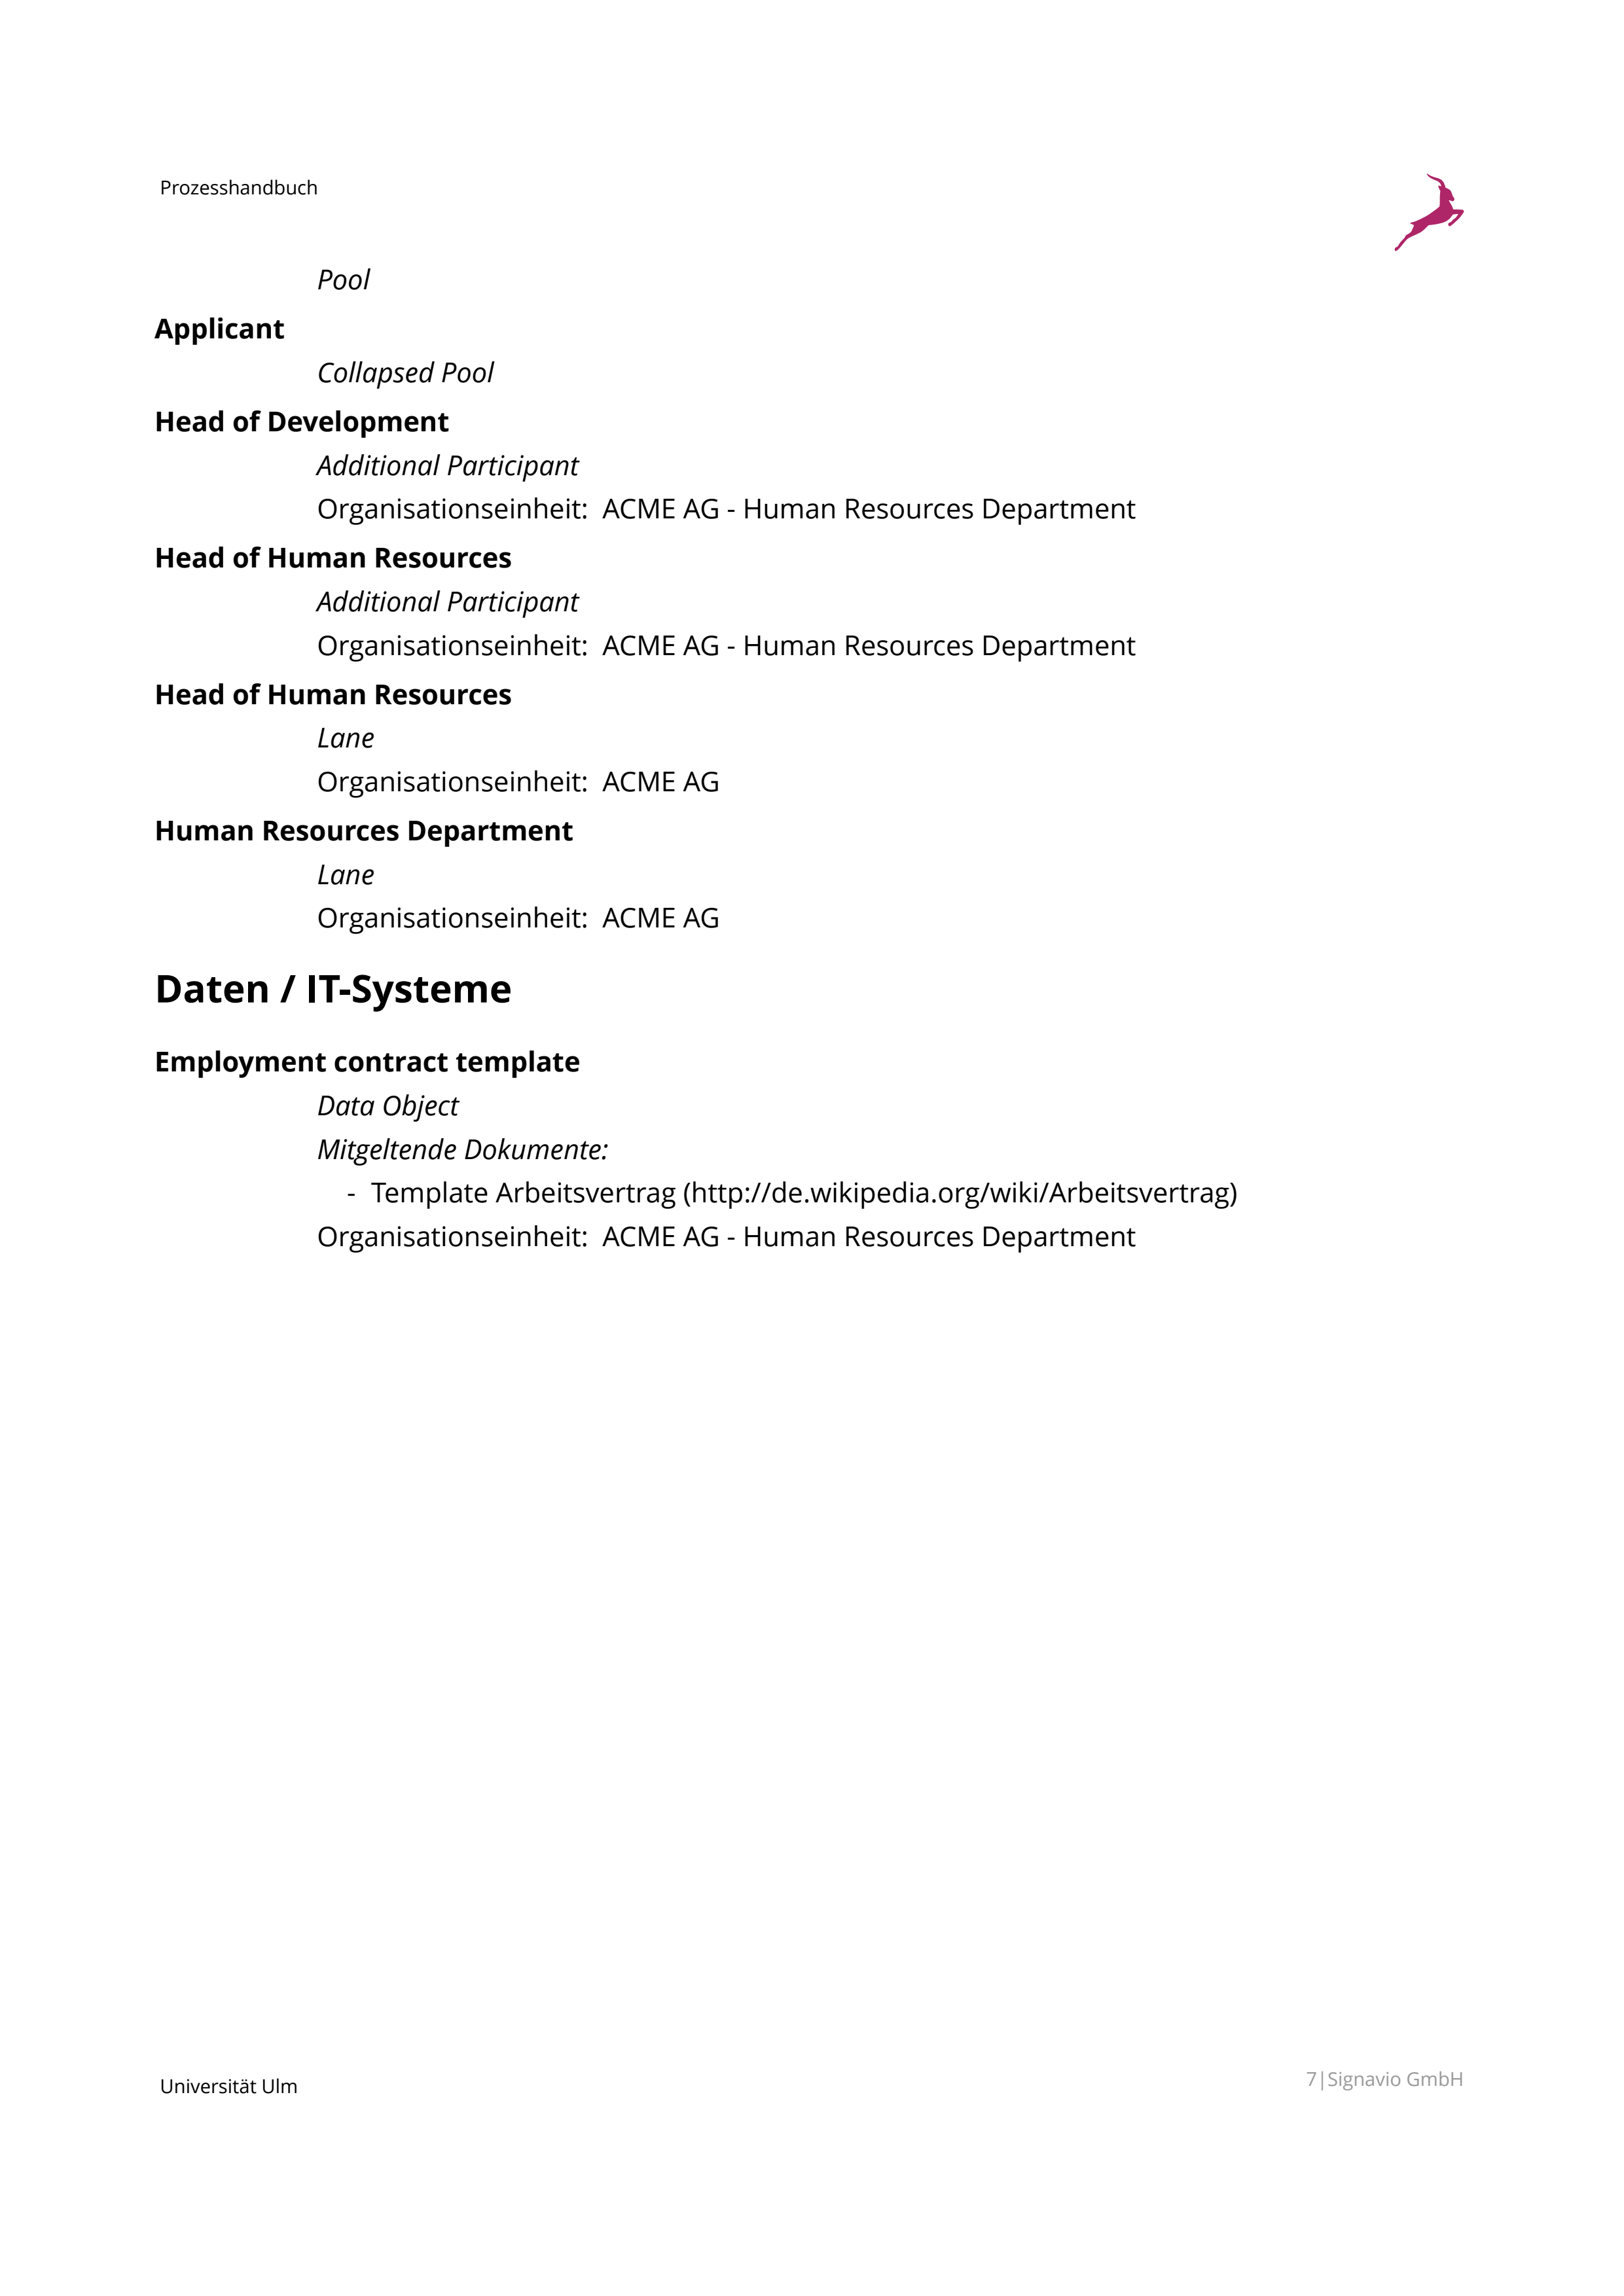

{'process': {'id': '0',
  'name': 'Receipt of application',
  'activities': [{'id': '1',
    'name': 'Receipt of application',
    'type': 'startEvent'},
   {'id': '2', 'name': 'Send receipt confirmation', 'type': 'task'},
   {'id': '3', 'name': 'Applicant verified', 'type': 'task'},
   {'id': '4', 'name': 'Application status?', 'type': 'exclusiveGateway'},
   {'id': '5', 'name': 'Invite to job interview', 'type': 'task'},
   {'id': '6', 'name': 'Prepare employment agreement', 'type': 'task'},
   {'id': '7', 'name': 'Carry out job interview', 'type': 'task'},
   {'id': '8', 'name': 'Applicant suitable?', 'type': 'exclusiveGateway'},
   {'id': '9', 'name': 'Send employment contract', 'type': 'task'},
   {'id': '10',
    'name': 'Receipt of signed employment contract',
    'type': 'intermediateEvent'},
   {'id': '11',
    'name': 'Signed employment contract is present',
    'type': 'endEvent'},
   {'id': '12', 'name': 'Send rejection', 'type': 'task'},
   {'id': '13', 'name': 'Rejection 

In [28]:
# Lets introduce LangChain to achieve a more readible and scalable code basis
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.prompts.chat import ChatPromptTemplate
from langchain.schema import AIMessage, HumanMessage, SystemMessage
from langchain.schema import BaseOutputParser
import json
from jsonschema import validate, ValidationError
import langchain 

langchain.debug = True


chat_model = ChatOpenAI(model="gpt-4-vision-preview", max_tokens=2000)


template = """You are a BPMN expert. Your task is to extract process information out of the passed documents which are parsed 
as a list of images where each image represents one page of the document. Make sure that you include the sequence flow. Use numbers for the ids starting from zero.
Generate json according to the following schema for extracting the process information. Only output the generated json. Schema: {schema}"""
prompt = SystemMessage(content=template)
chat_prompt = (HumanMessage(content=message_contents) + prompt)


class BPMNJsonOutputParser(BaseOutputParser):
    """Parse the output of an LLM call into a validated bpmn json format."""


    def parse(self, text: str):
        """Parse the output of an LLM call."""
        cleaned_json_string = text.replace('```json', '').replace('```', '').strip()
        json_output = json.loads(cleaned_json_string)
        try:
            validate(instance=json_output, schema=bpmn_schema)
        except ValidationError as e:
            print(e)
        return json_output


chain = chat_prompt | chat_model | BPMNJsonOutputParser()
res = chain.invoke({"schema": str(bpmn_schema)})
res ## same prompt as with chatGPT but way less reliable data (ignores the schema names and some attributes quite often).
    # Dont know why this is the case

# Mermaid.js
We can visualise the generated JSON here

In [ ]:
import json
from multimodalgenai.generation.mermaid import bpmn_to_mermaid

# Example usage
mermaid_diagram = bpmn_to_mermaid(generated_json)
print(mermaid_diagram)